# Исследование игровых платформ и успешности игры.
Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры.  

**Входные данные** Из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


**Цель исследования** выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Результаты исследования**  выявить потенциально популярный продукт для планирования рекламной кампании.


**Ход исследования**
Данные получаем из файла:  
`/datasets/games.csv`

О качестве данных ничего не известно. Поэтому понадобится обзор данных. 
Таким образом, исследование пройдёт по следующим этапам:  
1. Обзор данных.
2. Подготовка данных.
3. Исследовательякий анализ данных.
4. Портрет пользователя по регионам.
5. Проверка гипотез.
6. Общий вывод.

## Обзор данных.

In [1]:
!pip install seaborn==0.11.0

You should consider upgrading via the '/home/sv/my_project_dir/my_project_env/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings

In [3]:
# отключить некритические предупреждения в коде
warnings.filterwarnings("ignore")

In [4]:
# убрать экспонентациальные формы при выводе данных
pd.set_option('display.float_format', '{:,.2f}'.format)

In [5]:
# сбросим ограничение на количество выводимых столбцов, что бы просмотреть все столбцы
pd.set_option('display.max_columns', None)

In [6]:
# чтение файла с данными и сохранение в DataFrame
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [7]:
# получение первых 5 строк таблицы df
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Согласно документации к данным:  
**Описание данных:**  
`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
`EU_sales` — продажи в Европе (миллионы проданных копий)  
`JP_sales` — продажи в Японии (миллионы проданных копий)  
`Other_sales` — продажи в других странах (миллионы проданных копий)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 
Данные за 2016 год могут быть неполными.  

В названиях колонок нарушение стиля, необходимо изменить название колонок. 
Названия колонок соответствуют документации.  
Типы данных: необходимо проанализированть данные и по части столбцам изменить тип данных.  
Количество значений в столбцах не совпадает. Значит, в данных есть пропущенные значения. 


**Выводы**  
Предварительно можно утверждать, что, данных достаточно для  анализа, что бы  выявить определяющие успешность игры закономерности.

*Необходимо*:  
    
    - изменить названия колонок
    - изменить тип данных по столбцам, где это необходимо  
    - заполнить пропуски
    - проанализировать данные на наличие аномалий и ошибок    
    
    
Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Подготовка данных.

### Стиль заголовков

In [9]:
# перечень названий столбцов таблицы df
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

В названиях колонок строчные буквы сочетаются с прописными, перепишем названия столбцов в «змеином_регистре».

In [10]:
df.columns = df.columns.str.lower()

In [11]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Заполним пропуски и изменим тип данных

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [13]:
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
# удалим строки с пропущенными значениями по name
df.dropna(subset=['name'],inplace=True)
df.shape

(16713, 11)

#### Заполнение пропусков и изменение типа данных по столбцу year_of_release

In [15]:
# посмотрим статистику по столбцу year_of_release
df.year_of_release.describe()

count   16,444.00
mean     2,006.49
std          5.88
min      1,980.00
25%      2,003.00
50%      2,007.00
75%      2,010.00
max      2,016.00
Name: year_of_release, dtype: float64

In [16]:
# посмотрим примеры данных в которых пропущен год выпуска игры
df[df.year_of_release.isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [17]:
# отфильтруем данные по названию первой игры, по которой пропущена информация о годе выпуска
df[df.name=='Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
1881,Madden NFL 2004,XB,"2,003.00",Sports,1.02,0.02,0.00,0.05,92.00,8.3,E
3889,Madden NFL 2004,GC,"2,003.00",Sports,0.40,0.10,0.00,0.01,94.00,7.7,E
5708,Madden NFL 2004,GBA,"2,003.00",Sports,0.22,0.08,0.00,0.01,70.00,6.6,E


Заполним пропущенные данные по году выпуска данными, отфильтрованными по названию игры, с проверкой , что год выпуска игры с одним названием совпадает. 

In [18]:
# заполним пропущенные значения по году выпуска данными полученными по данной игре на другой платформе.
for i in df[df.year_of_release.isna()]['name'].unique():
    if df.query('name == @i and ~(year_of_release.isna())')['year_of_release'].nunique() == 1:
        temp = df.query('name == @i and ~(year_of_release.isna())')['year_of_release'].unique()
        df.loc[(df['name'] == i) & (df['year_of_release'].isna()),'year_of_release'] = temp[0]

In [19]:
print('Незаполненных значений по year_of_release осталось {0:.2%}'.format(df[df.year_of_release.isna()].shape[0]/df.shape[0]))

Незаполненных значений по year_of_release осталось 0.95%


In [20]:
# удалим строки с пропущенными значениями по year_of_release, 
# по которым нет возможности заполнить пропуски по информации о названии игры(это менее 1 процента датафрейма)
df.dropna(subset=['year_of_release'],inplace=True)
df.shape

(16555, 11)

In [21]:
# проверим , что не осталось пропущенных значений по столбцу year_of_release
df.year_of_release.isna().sum()

0

По столбцу `year_of_release` тип данных float заменим на integer

In [22]:
df['year_of_release'] = df['year_of_release'].astype('int')

#### Заполнение пропусков и изменение типа данных по столбцу user_score

In [23]:
# Посмотрим значения и их частоту встречаемости по столбцу user_score
df.user_score.value_counts()

tbd    2391
7.8     324
8       287
8.2     279
8.3     253
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Данную абревиатуру следует заменить на значение аналогичные , при заполнении пропущенных значений. Заменим строки с данной аббревиатурой на значение nan.

In [24]:
df.loc[df['user_score']=='tbd','user_score'] = np.nan

по `user_score` тип данных object заменим на float.
Применим метод astype(). Данный метод позволяет четко указать тип данных, который мы хотим иметь в своем DataFrame или Series. Он очень универсален в том, что мы можем попробовать перейти от одного типа к другому.

In [25]:
df['user_score'] = df['user_score'].astype('float')

In [26]:
# посмотрим статистистику по стобцу user_score
df['user_score'].describe()

count   7,535.00
mean        7.13
std         1.50
min         0.00
25%         6.40
50%         7.50
75%         8.20
max         9.70
Name: user_score, dtype: float64

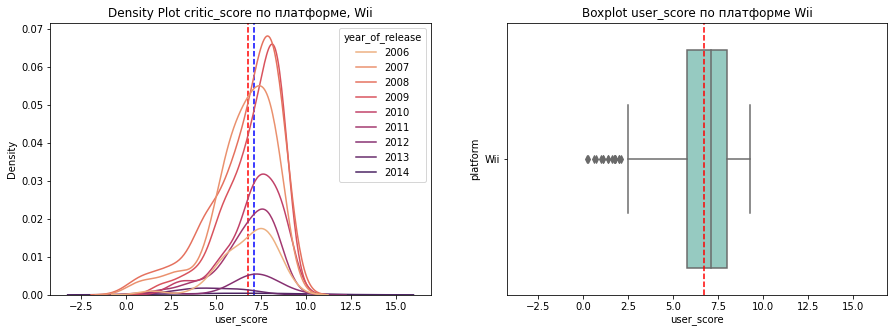

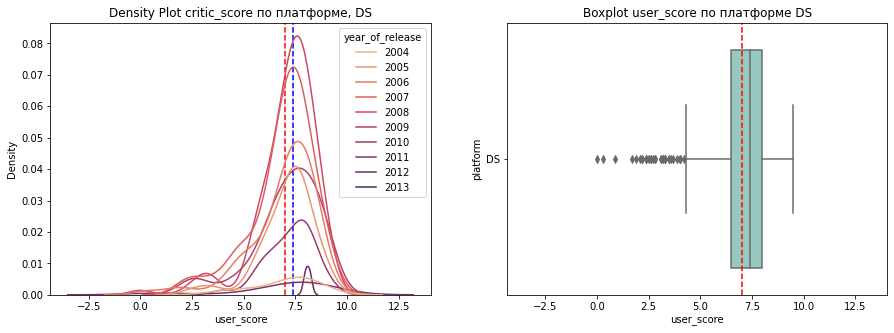

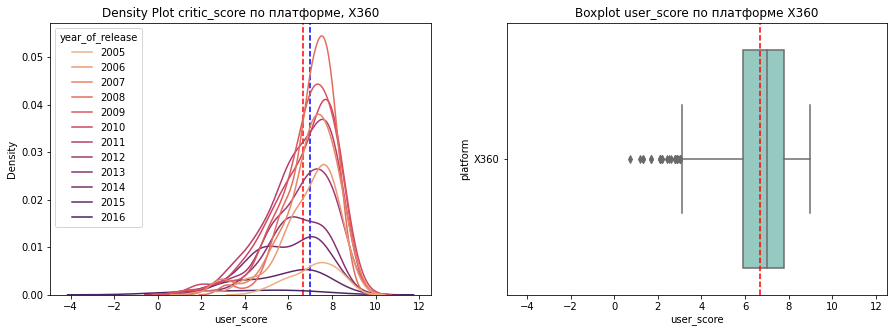

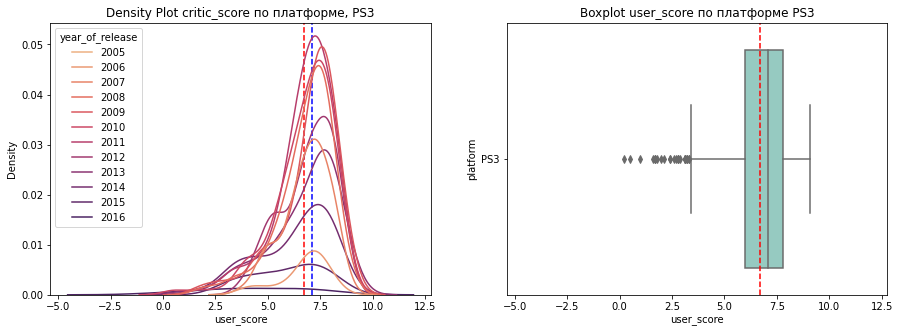

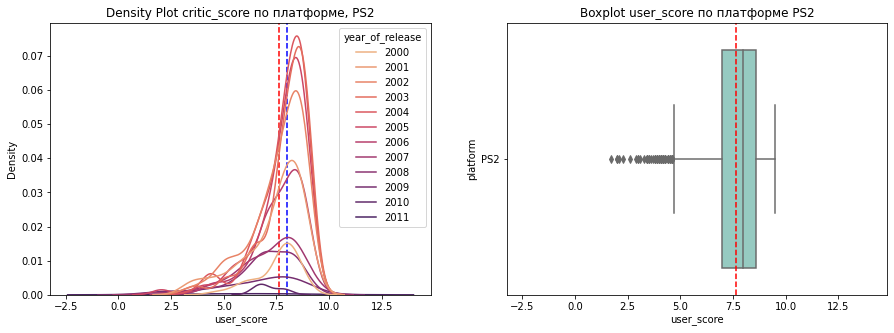

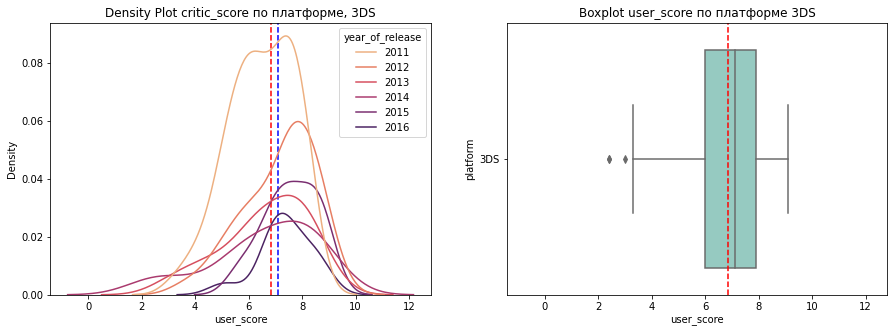

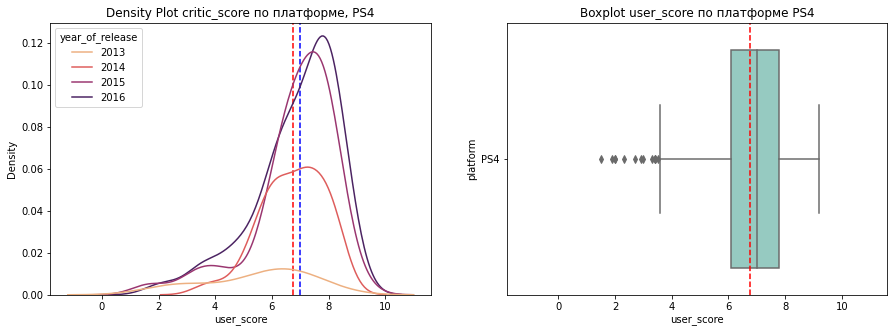

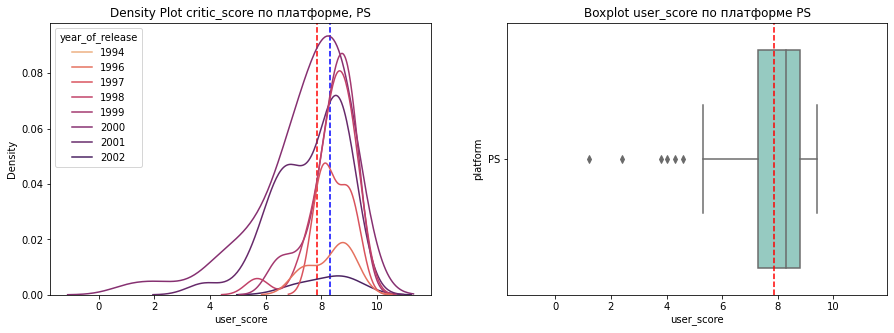

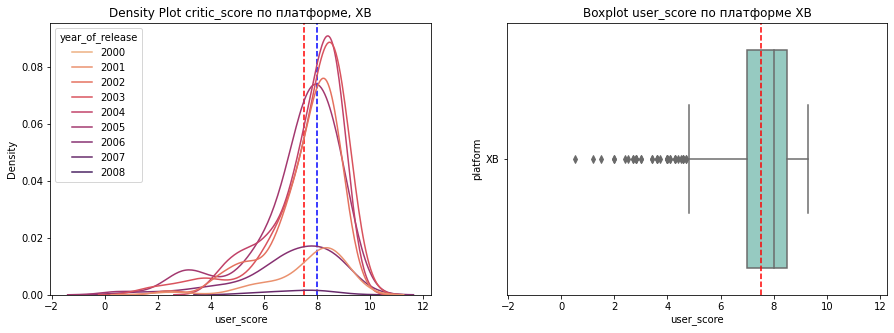

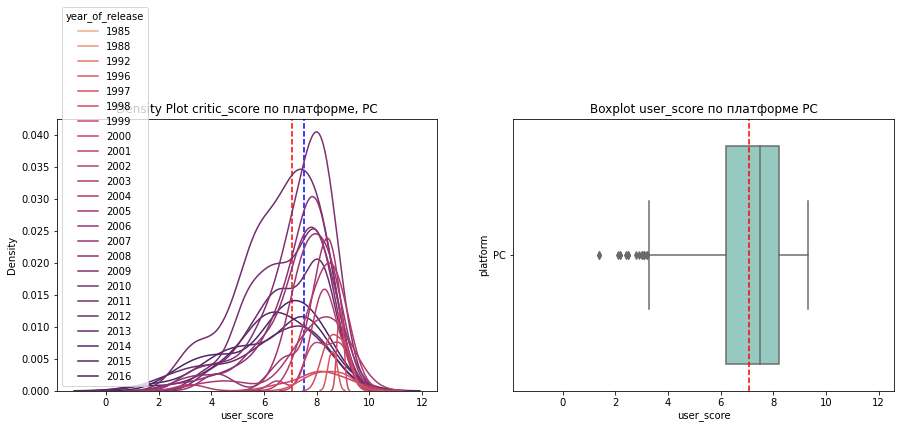

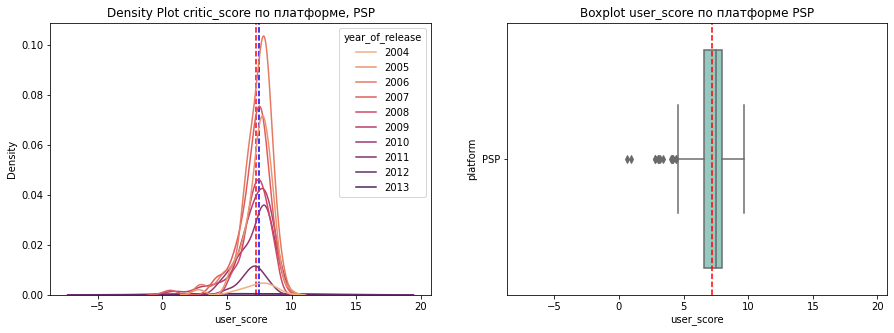

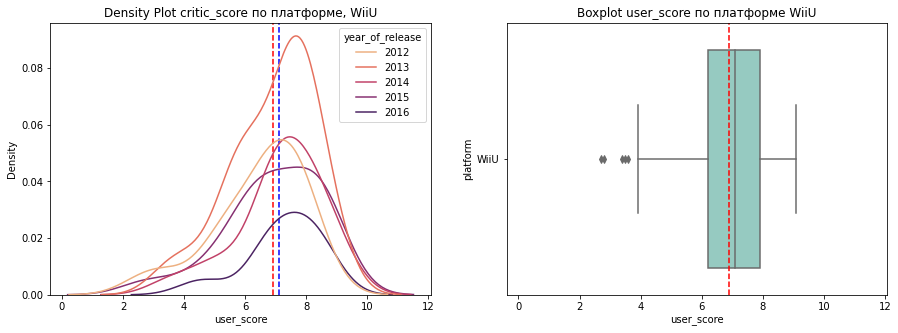

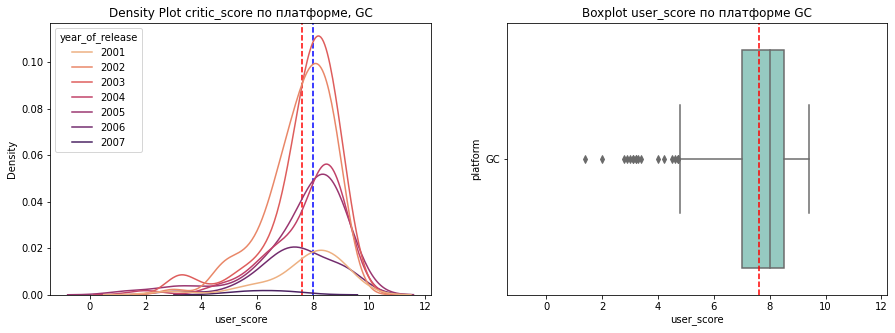

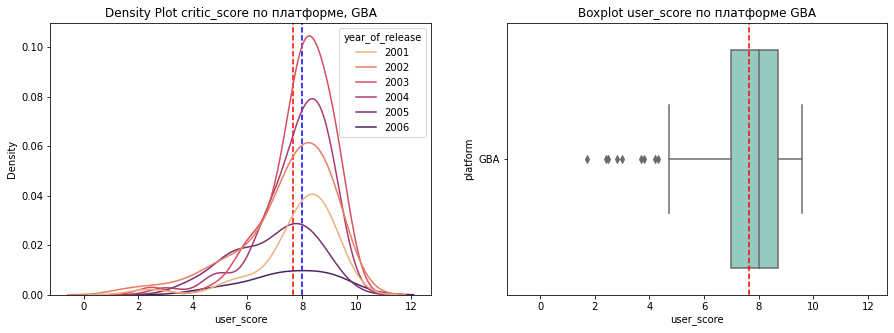

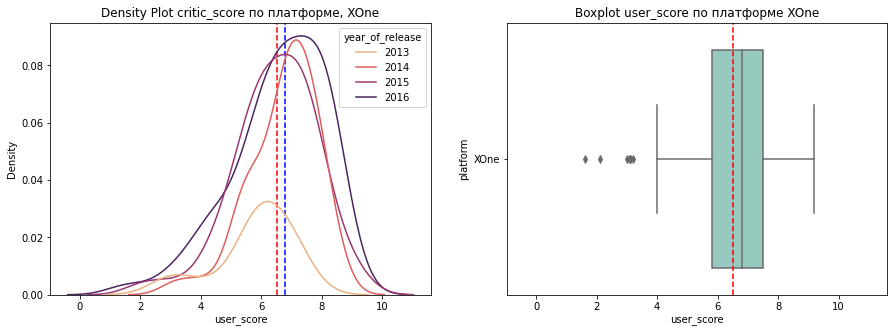

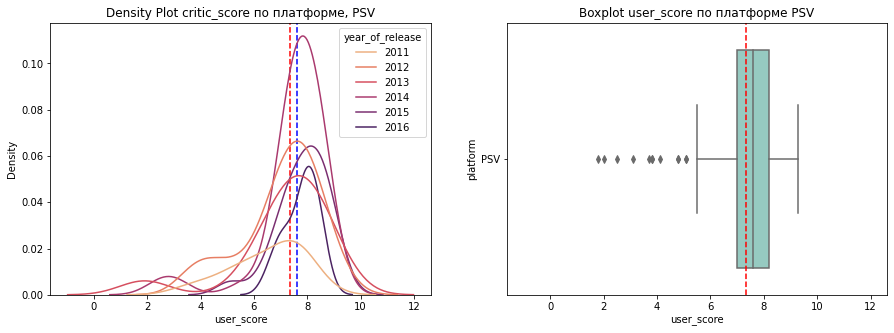

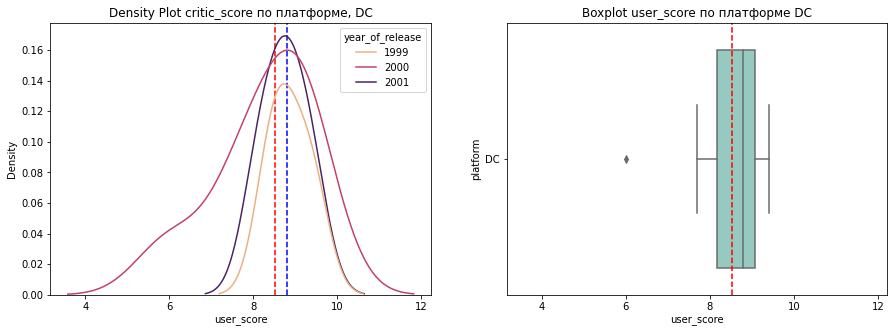

In [27]:
# Посмотрим Плотность распределения и boxplot по user_score в разрезе платфоорм (плотность распределения еще и в разрезе годов)
# обозначим на графиках линии среднего и медианы
platforms = df.query('~user_score.isna()')['platform'].unique()
for i in platforms:   
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
    axes[0].axvline(df.query('platform == @i and ~user_score.isna()')['user_score'].mean(), color='r', linestyle='--')
    axes[0].axvline(df.query('platform == @i and ~user_score.isna()')['user_score'].median(), color='b', linestyle='--')
    sns.kdeplot(data=df.query('platform == @i and ~user_score.isna()'), x='user_score', hue='year_of_release',palette=sns.color_palette("flare", as_cmap=True),ax=axes[0])
    axes[0].set_title(f'Density Plot critic_score по платформе, {i}')
    axes[1].axvline(df.query('platform == @i and ~user_score.isna()')['user_score'].mean(), color='r', linestyle='--')
    sns.boxplot(x = 'user_score', y = 'platform', data = df.query('platform == @i and ~user_score.isna()'), orient="h", palette="Set3",ax=axes[1])
    axes[1].set_title(f'Boxplot user_score по платформе {i}')

По всем платформам среднее меньше , чем медиана, т.е. данные скошены влево, по всем платформам имеются выбросы слева,которые и являются причиной занижения среднего значения по user_score.

Оценка пользователя - это очень субъективный показатель, который сильно зависит от конкретной игры. Пропуски в оценке пользователей заполнять не будем.

In [28]:
df.user_score.isna().sum()

9020

In [29]:
print('По user_score осталось {0:.2%} незаполненных данных'.format(df['user_score'].isna().sum()/df.shape[0]))

По user_score осталось 54.49% незаполненных данных


In [30]:
# посмотрим статичтику по user_score после частичного заполнения пропущенных значений
df['user_score'].describe()

count   7,535.00
mean        7.13
std         1.50
min         0.00
25%         6.40
50%         7.50
75%         8.20
max         9.70
Name: user_score, dtype: float64

#### заполнение пропусков по столбцу critic_score

In [31]:
# посмотрим статистику по critic_score
df['critic_score'].describe()

count   8,068.00
mean       69.00
std        13.92
min        13.00
25%        60.00
50%        71.00
75%        79.00
max        98.00
Name: critic_score, dtype: float64

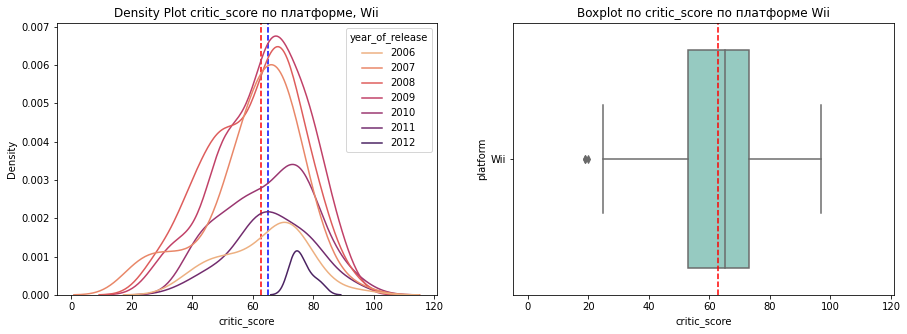

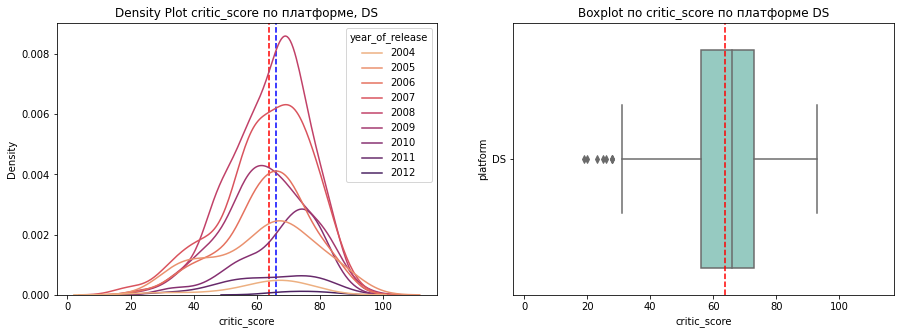

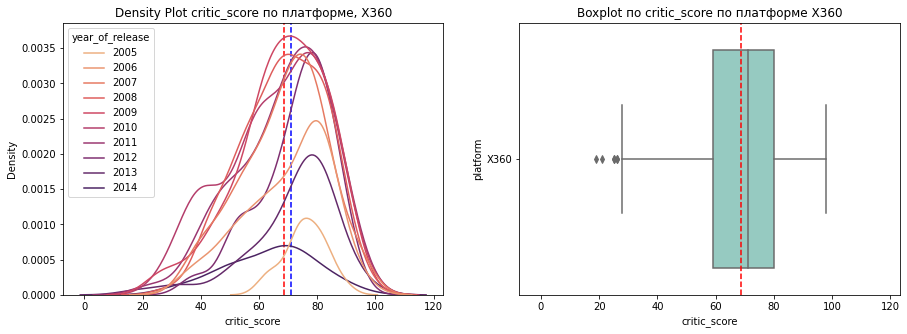

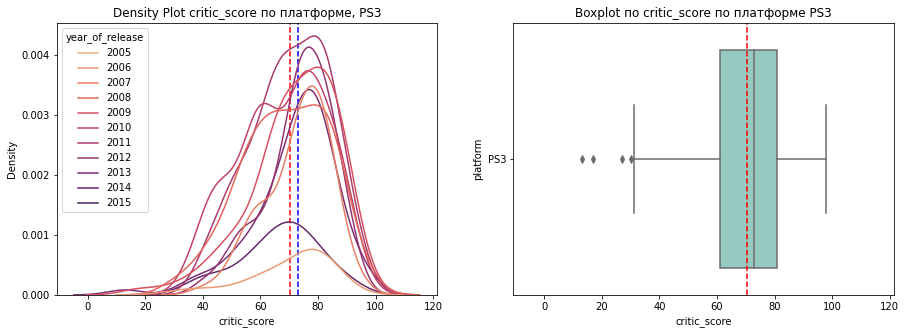

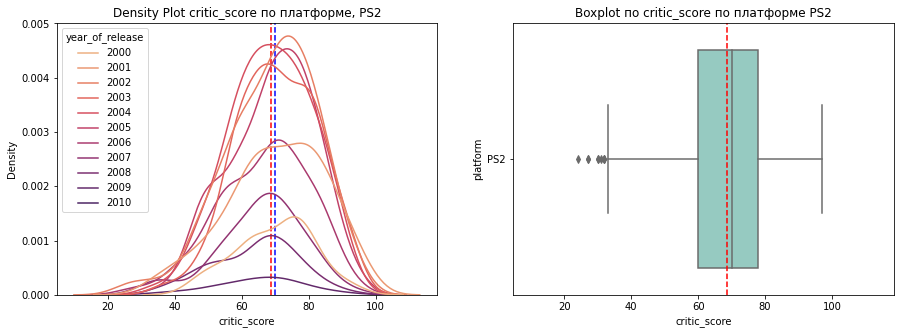

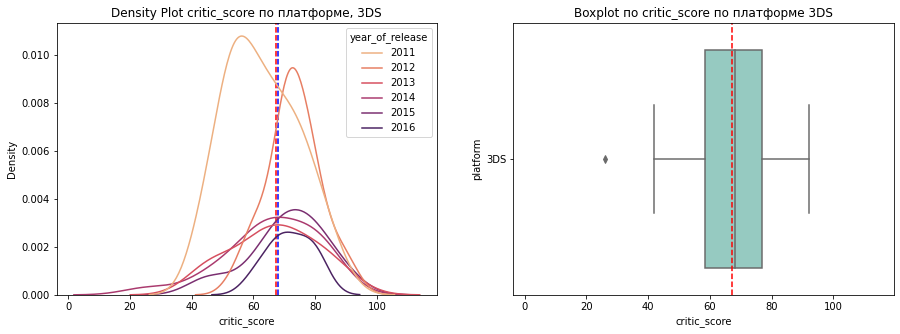

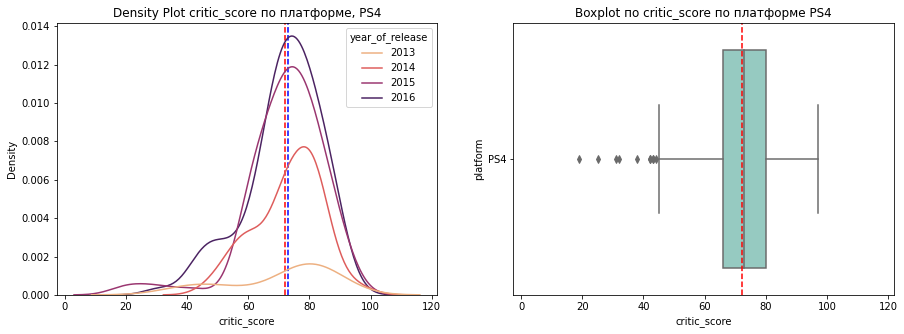

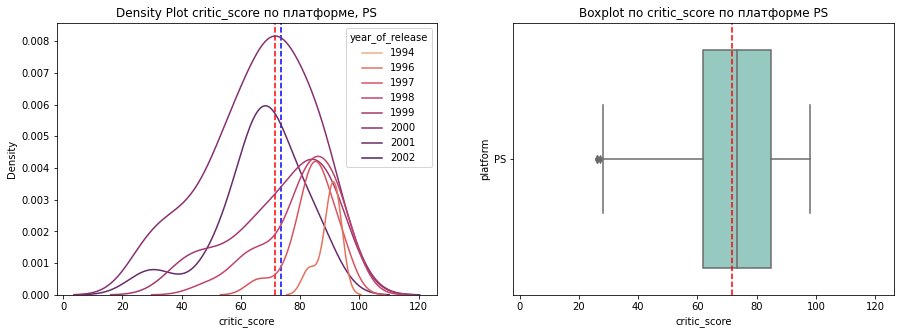

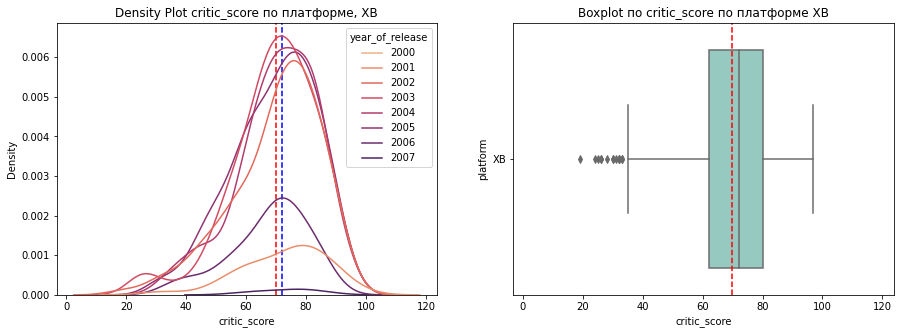

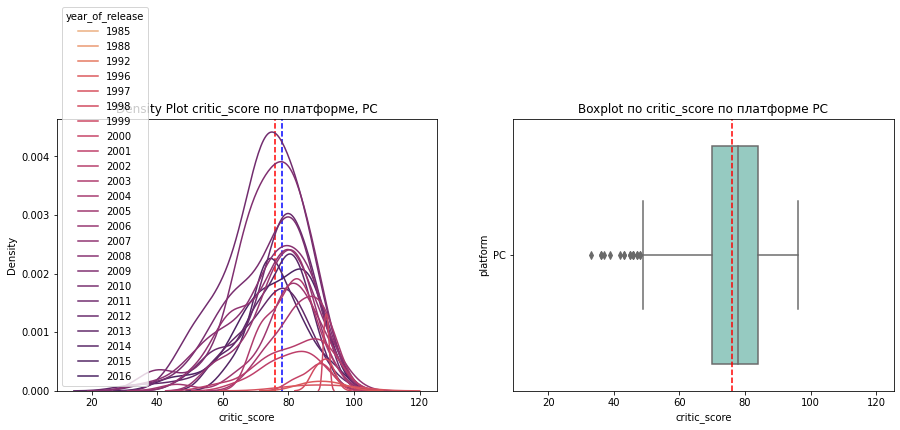

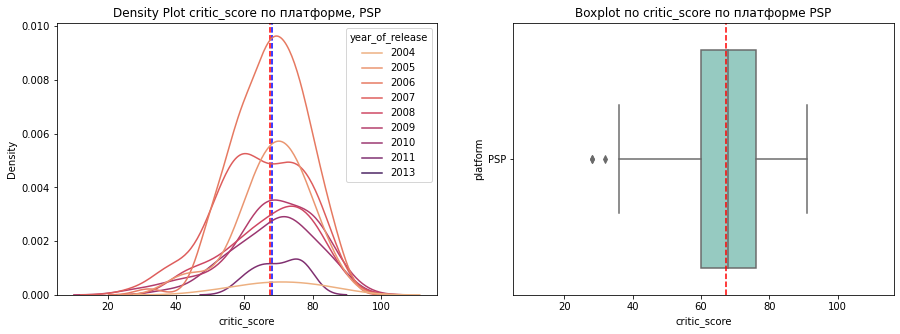

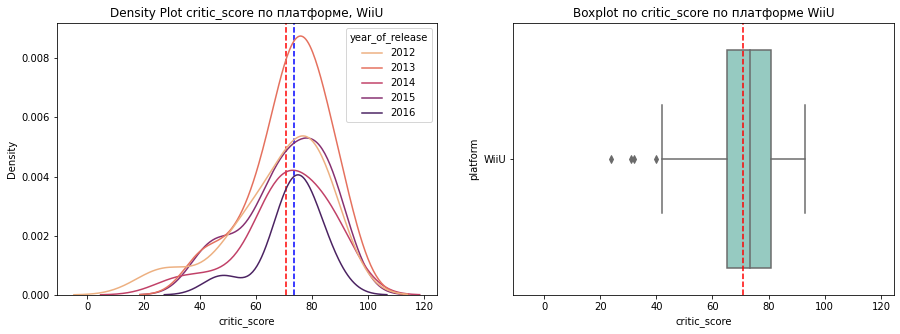

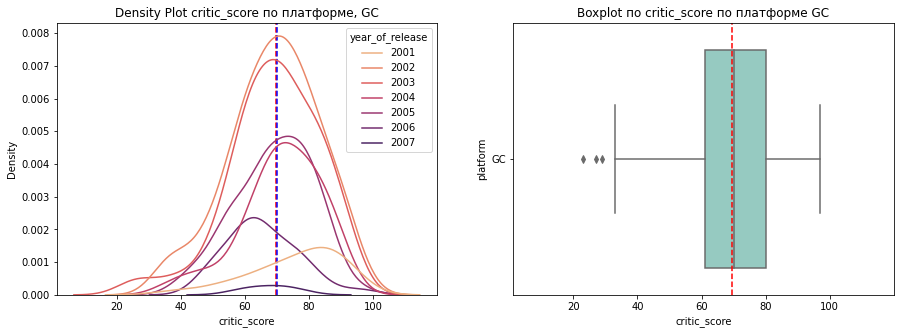

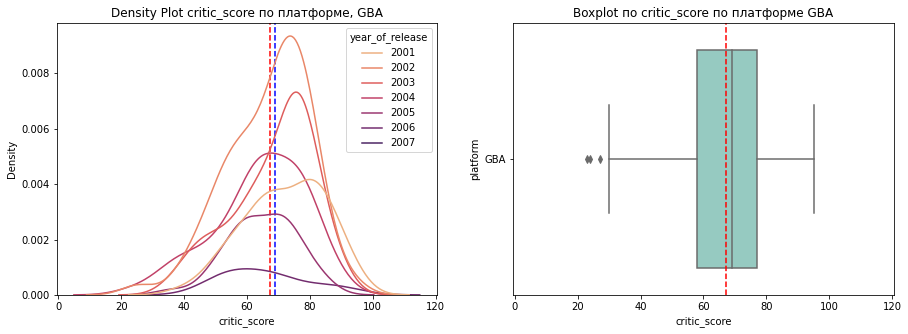

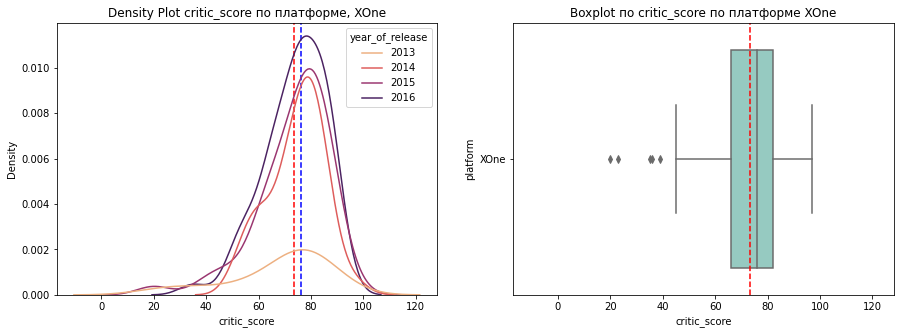

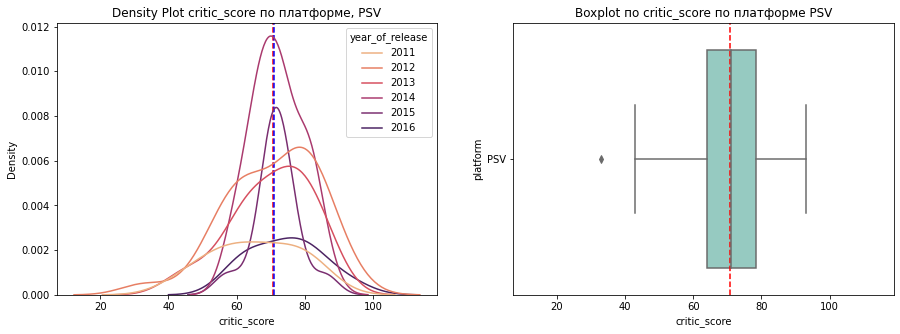

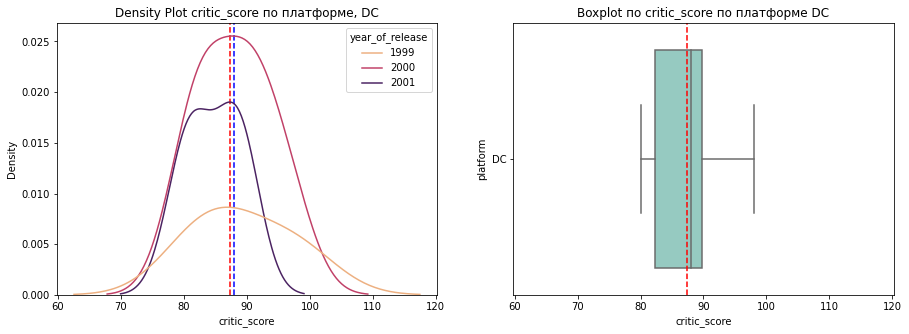

In [32]:
# Посмотрим Плотность распределения и boxplot по critic_score в разрезе платфоорм (плотность распределения еще и в разрезе годов)
# обозначим на графиках линии среднего и медианы
platforms = df.query('~critic_score.isna()')['platform'].unique()
for i in platforms:   
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
    axes[0].axvline(df.query('platform == @i and ~critic_score.isna()')['critic_score'].mean(), color='r', linestyle='--')
    axes[0].axvline(df.query('platform == @i and ~critic_score.isna()')['critic_score'].median(), color='b', linestyle='--')
    sns.kdeplot(data=df.query('platform == @i and ~critic_score.isna()'), x='critic_score', hue='year_of_release',palette=sns.color_palette("flare", as_cmap=True),ax=axes[0])
    axes[0].set_title(f'Density Plot critic_score по платформе, {i}')
    axes[1].axvline(df.query('platform == @i and ~critic_score.isna()')['critic_score'].mean(), color='r', linestyle='--')
    sns.boxplot(x = 'critic_score', y = 'platform', data = df.query('platform == @i and ~critic_score.isna()'), orient="h", palette="Set3",ax=axes[1])
    axes[1].set_title(f'Boxplot по critic_score по платформе {i}')

Ситуация аналогичная user_score: по большинству платформ среднее меньше , чем медиана, т.е. данные скошены влево, по всем платформам, если имеются выбросы, то они слева и являются причиной занижения среднего значения по user_score. 

Оценка критиков- это очень субъективный показатель, который сильно зависит от конкретной игры. Пропуски в оценке критиков заполнять не будем.

In [33]:
print('По critic_score осталось {0:.2%} незаполненных данных'.format(df['critic_score'].isna().sum()/df.shape[0]))


По critic_score осталось 51.27% незаполненных данных


In [34]:
# Посмотрим статистику по 'critic_score' после заполнения пропущенных значений
df['critic_score'].describe()

count   8,068.00
mean       69.00
std        13.92
min        13.00
25%        60.00
50%        71.00
75%        79.00
max        98.00
Name: critic_score, dtype: float64

#### заполнение пропусков по столбцу rating

In [35]:
df.rating.value_counts()

E       3954
T       2929
M       1552
E10+    1411
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board  
«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет   
«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.   
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
«T» («Teen») — «Подросткам» Игра подходит для лиц от 13 лет.  
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет  
«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.  
«RP» («Rating Pending») — «Рейтинг ожидается»:   
K-A for Kids to Adults: Games that contain content that is suitable for a general audience. This rating was used until the year 1998 when it renamed to E  


Изменим 'K-A' рейтинг на 'Е'

In [36]:
df.loc[df['rating']=='K-A','rating'] = 'E'

In [37]:
df.rating.isna().sum()/df.shape[0]*100

40.44095439444277

In [38]:
# Заполним пропущенные значения по рейтингу новой категорией unknown
df.rating.fillna('Unknown',inplace=True)

In [39]:
# проверим, что не осталось пропущенных значений
df.rating.isna().sum()/df.shape[0]*100

0.0

**Вывод:**  
В связи с тем , что данные из открытых источников достаточно много пропущенных значений.  
Были удалены строки с отсутствующим названием игры(2 строки).  
Год выпуска, пропущенный в данных, проставлялся, опираясь на название игры. Менее 1 % данных было удалено в связи с невозможностью проставить год выпуска. По году выпуска изменен тип данных на integer.  
Пропущенные данные по оценке пользователей и критиков не заполнялись. По оценке пользователей изменен тип данных на float. Значение tbd заменено на nan.  
По рейтингу добавлена дополнительная категория unknown по данным, по которым отсутствует информация о рейтинге.

### Суммарные продажи по всем регионам

In [40]:
sales = ['na_sales','eu_sales','jp_sales','other_sales']

In [41]:
# Статистика по проажам в разных регионах
for i in sales:
    if i == 'na_sales':
        print('Статистика по продажам в Северной Америке')
    elif i == 'eu_sales':
        print('Статистика по продажам в Европе')
    elif i == 'jp_sales':
        print('Статистика по продажам в Японии')
    else:
        print('Статистика по продажам в прочих регионах')
    print(df[i].describe())
    print()

Статистика по продажам в Северной Америке
count   16,555.00
mean         0.26
std          0.82
min          0.00
25%          0.00
50%          0.08
75%          0.24
max         41.36
Name: na_sales, dtype: float64

Статистика по продажам в Европе
count   16,555.00
mean         0.15
std          0.51
min          0.00
25%          0.00
50%          0.02
75%          0.11
max         28.96
Name: eu_sales, dtype: float64

Статистика по продажам в Японии
count   16,555.00
mean         0.08
std          0.31
min          0.00
25%          0.00
50%          0.00
75%          0.04
max         10.22
Name: jp_sales, dtype: float64

Статистика по продажам в прочих регионах
count   16,555.00
mean         0.05
std          0.19
min          0.00
25%          0.00
50%          0.01
75%          0.03
max         10.57
Name: other_sales, dtype: float64



Text(0, 0.5, 'Плотность частоты')

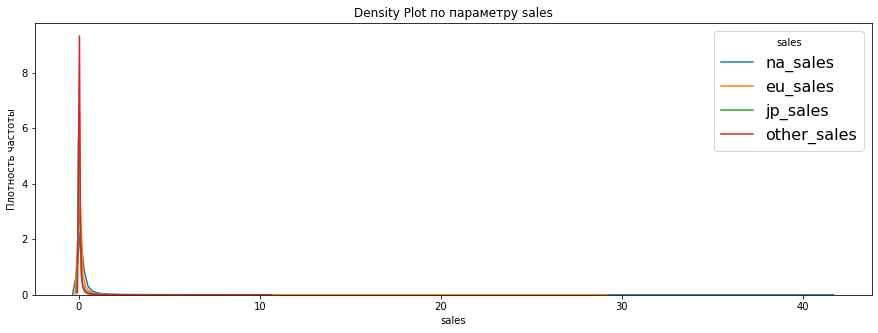

In [42]:
# Построим график плотности частоты по продажам по разным регионам
plt.figure(figsize=(15,5))
for i in sales:
    sns.distplot((df[i]),
                    hist = False, 
                    kde = True,
                    kde_kws = {'linewidth': 1.5},
                    label = i)

plt.legend(prop={'size': 16}, title = 'sales')
plt.title(f'Density Plot по параметру sales')
plt.xlabel(f'sales')
plt.ylabel('Плотность частоты')

Text(0, 0.5, 'Плотность частоты')

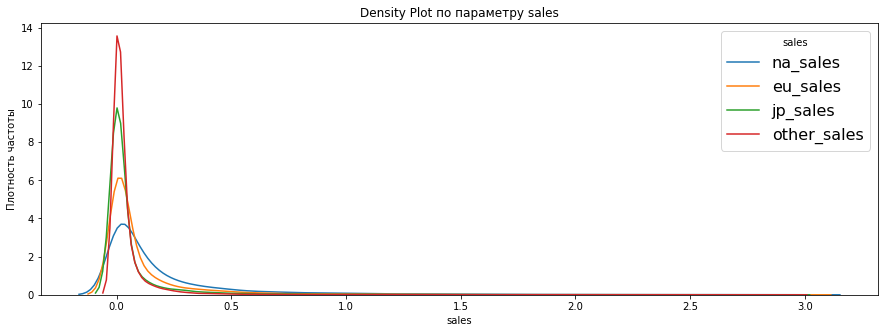

In [43]:
# Построим график плогности частоты по продажам по разным регионам на участе менее 3 млн проданных копий
plt.figure(figsize=(15,5))
for i in sales:
    sns.distplot(df[df[i]<3][i],
                    hist = False, 
                    kde = True,
                    kde_kws = {'linewidth': 1.5},
                    label = i)

plt.legend(prop={'size': 16}, title = 'sales')
plt.title(f'Density Plot по параметру sales')
plt.xlabel(f'sales')
plt.ylabel('Плотность частоты')

In [44]:
print('Доля продаж свыше 3 млн копий по Северной Америке {0:.2%}'.format(df[df['na_sales']>3].shape[0]/df.shape[0]))


Доля продаж свыше 3 млн копий по Северной Америке 0.89%


In [45]:
# Создадим столбец с суммарными продажами по всем регионам
df['sale'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

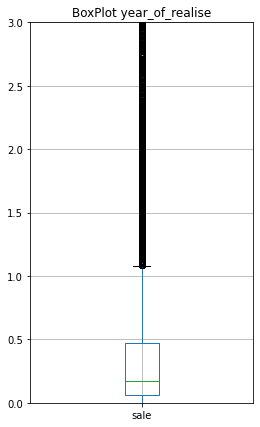

In [46]:
# Построим бокс плот по году выпуска
df.boxplot('sale',figsize=(4,7))
plt.ylim(0, 3)
plt.title('BoxPlot year_of_realise')
plt.show()

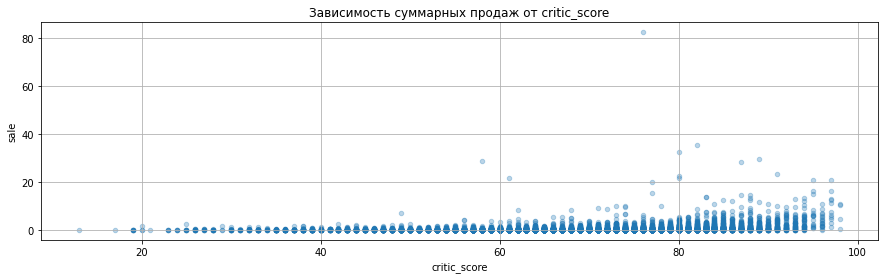

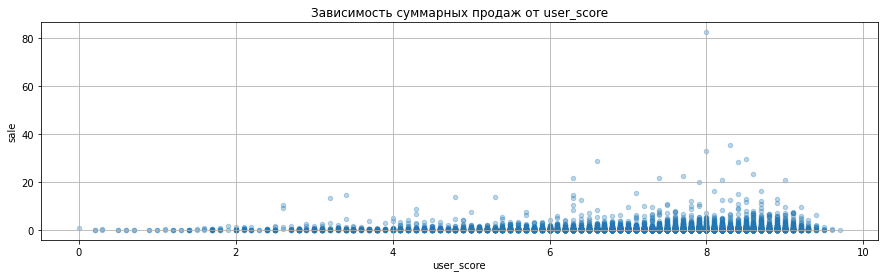

In [47]:
# Построим графики зависимости суммарных продаж от оценки критиков и пользователей
factors = ['critic_score','user_score']
for i in factors:    
    df.plot(x=i,
            y='sale',
            kind='scatter',
            grid='True',
            figsize=(15,4),
            title=f'Зависимость суммарных продаж от {i}',
            alpha=0.3)
    plt.show()

Согласно первому графику , чем выше рейтинг критика, тем шире разброс в объеме продаж.

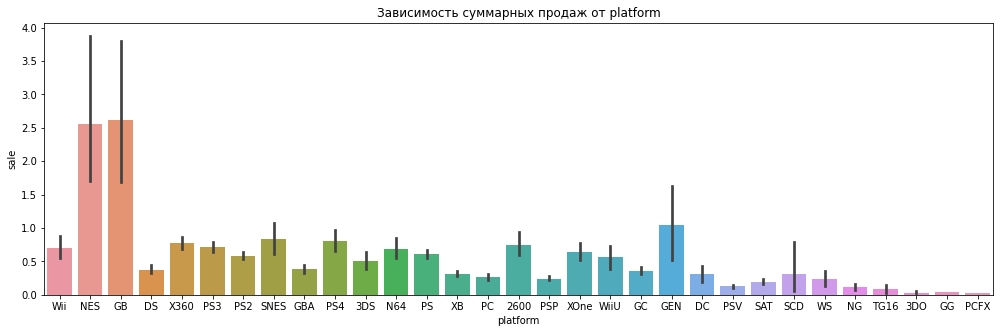

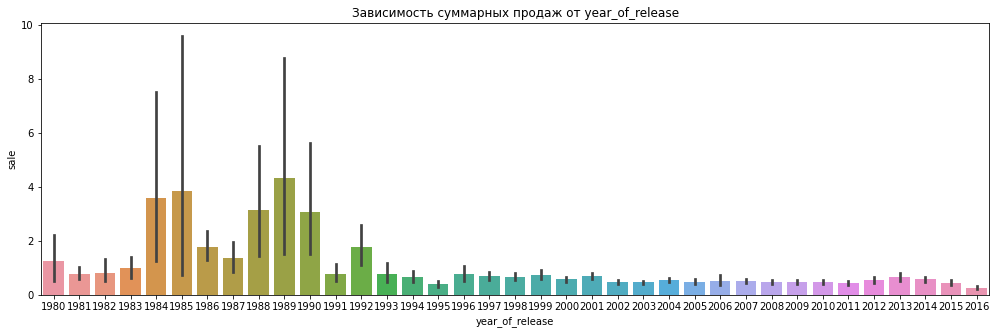

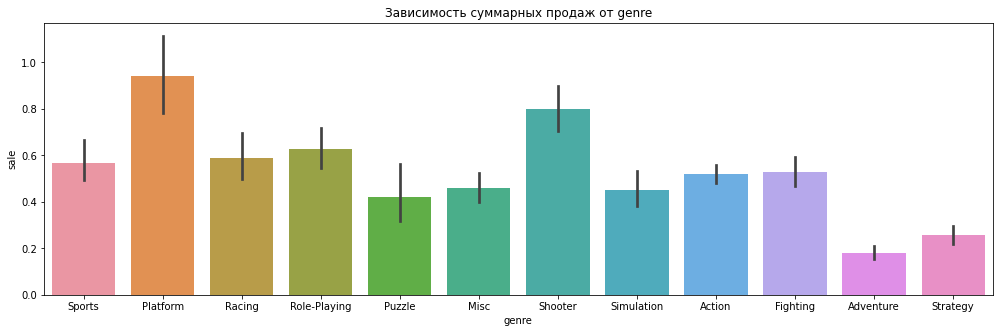

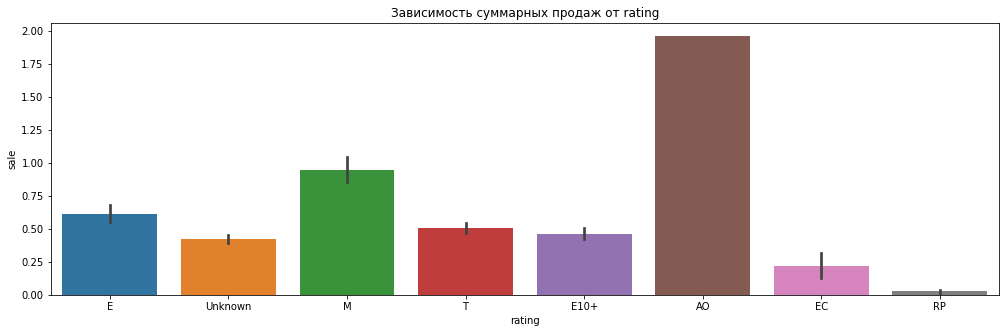

In [48]:
# Построим графики зависимости суммарных продаж от платформы,года выпуска,жанра и рейтинга
factors_cat = ['platform','year_of_release','genre','rating']
for i in factors_cat:    
    plt.figure(figsize=(17,5))
    sns.barplot(df[i],df['sale'])
    plt.title(f'Зависимость суммарных продаж от {i}')
    plt.show()

**Вывод:**  
Создан столбец по суммарным продажам в разных регионах.  
Согласно первому графику , чем выше рейтинг критика, тем шире разброс в объеме продаж. Более детальный анализ ниже в ноутбуке.
Размер продаж зависит от платформы, года выпуска, жанра, рейтинга. Более детальный анализ далее в блокноте.

## Исследовательякий анализ данных.

### Рассчитаем сколько игр выпускалось в разные годы

In [49]:
# Рассчитаем сколько игр выпускалось в разные годы
df['year_of_release'].value_counts()

2008    1440
2009    1430
2010    1269
2007    1202
2011    1153
2006    1018
2005     947
2002     842
2003     783
2004     764
2012     662
2015     606
2014     581
2013     547
2016     502
2001     484
1998     379
2000     350
1999     339
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

In [50]:
# посмотрим статистику по годам выпуска
df['year_of_release'].describe()

count   16,555.00
mean     2,006.49
std          5.86
min      1,980.00
25%      2,003.00
50%      2,007.00
75%      2,010.00
max      2,016.00
Name: year_of_release, dtype: float64

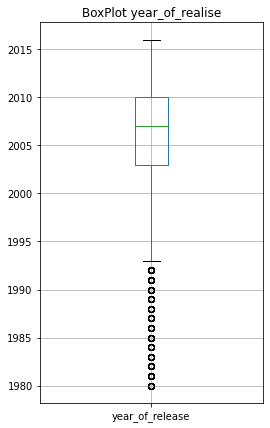

In [51]:
# Построим бокс плот по году выпуска
df.boxplot('year_of_release',figsize=(4,7))
plt.title('BoxPlot year_of_realise')
plt.show()

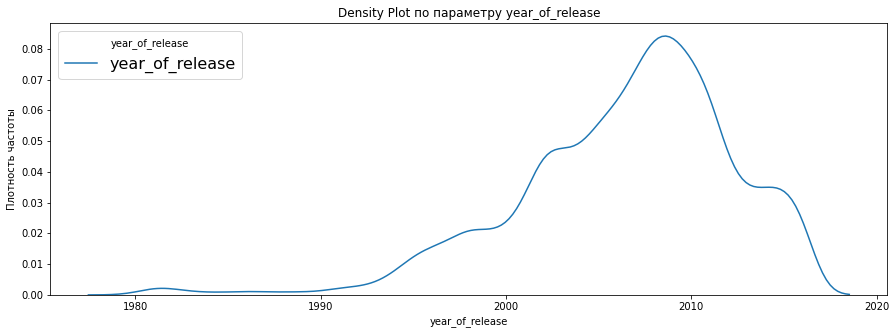

In [52]:
# Построим график плотности частоты по году выпуска
plt.figure(figsize=(15,5))
sns.distplot(df['year_of_release'],
             hist = False, 
             kde = True,
             kde_kws = {'linewidth': 1.5},
             label = 'year_of_release')

plt.legend(prop={'size': 16}, title = 'year_of_release')
plt.title(f'Density Plot по параметру year_of_release')
plt.xlabel(f'year_of_release')
plt.ylabel('Плотность частоты')
plt.show()

Согласно графикам до 1993 года данные можно отнести к 'выбросам', количество игр выпускаемых до 1993 года очень маленькое. Посмотрим количество записей в исходном датайрейме с годом выпуска до 1993 год включительно

In [53]:
print('До 1993 года включительно выпущено {0:.2%} игр'.format(df.query('year_of_release <= 1993').shape[0]/df.shape[0]))

До 1993 года включительно выпущено 2.20% игр


In [54]:
# Создадим датафрейм с записями по играм, выпущенным после 1993 года
df_= df.query('year_of_release > 1993')

**Вывод**  
Согласно графикам до 1993 года данные можно отнести к 'выбросам', создан датафрейм с данными после 1993 год.

### Анализ продаж по платформам.

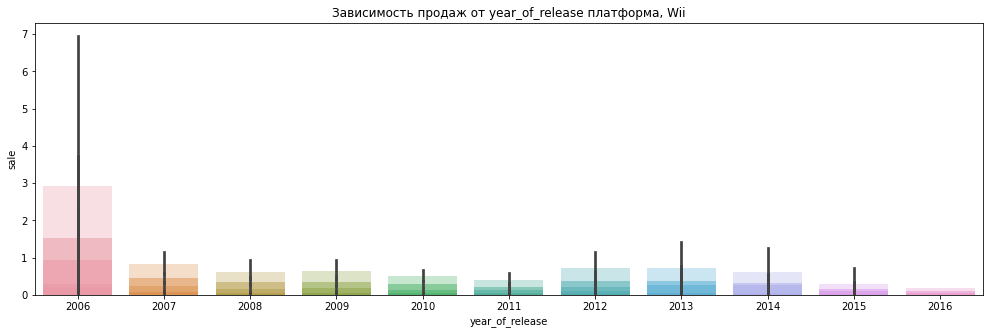

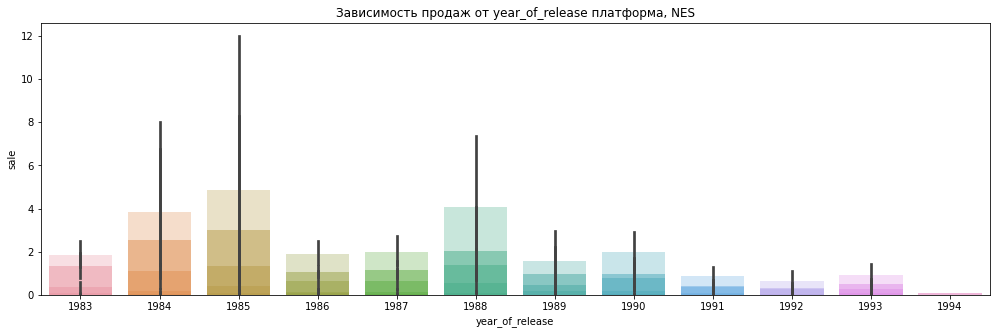

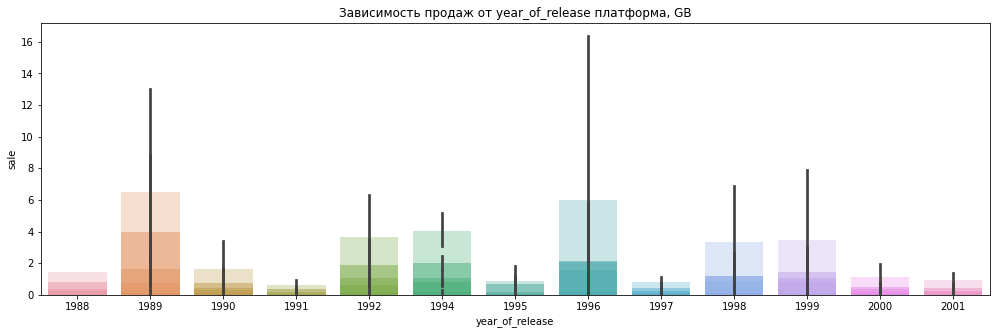

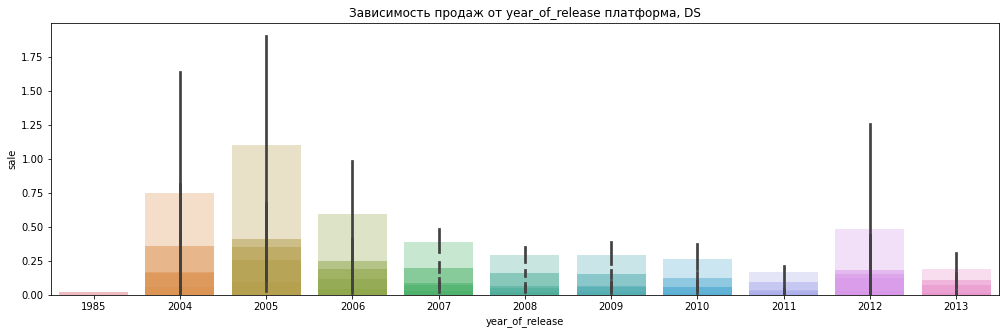

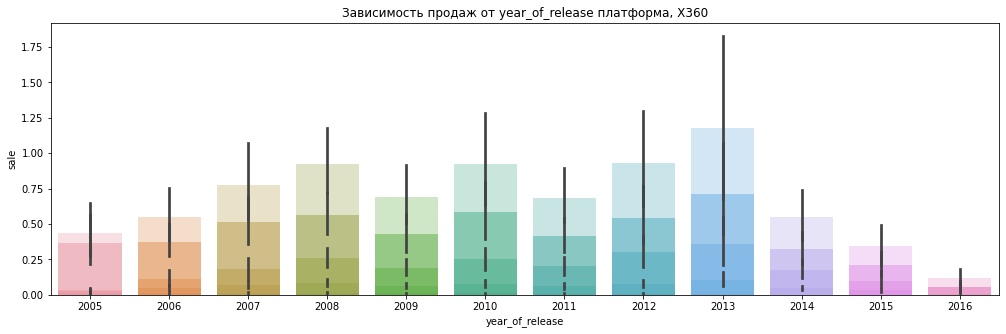

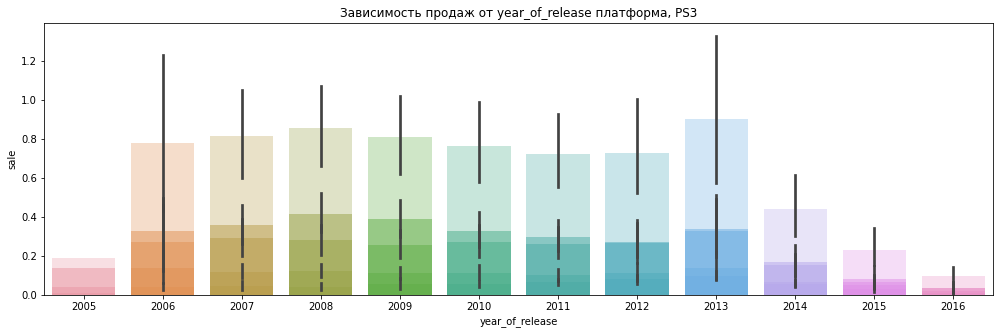

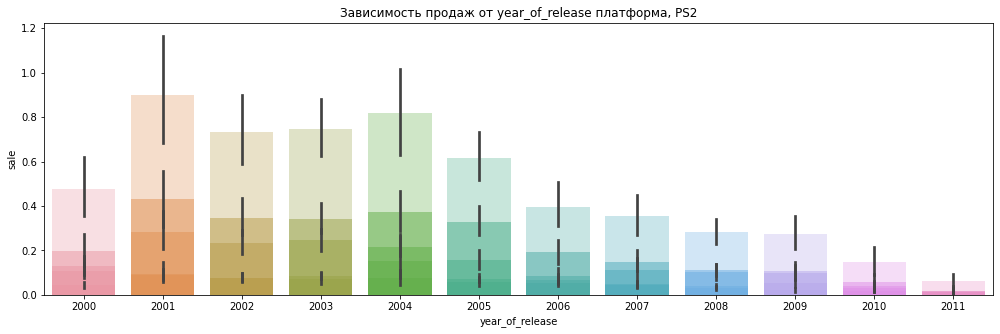

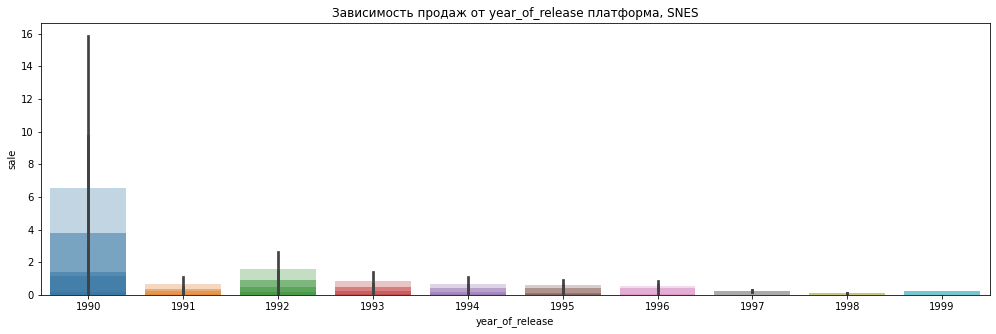

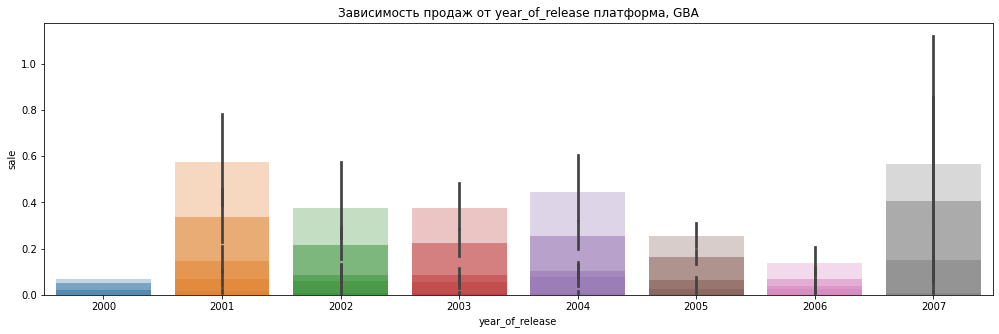

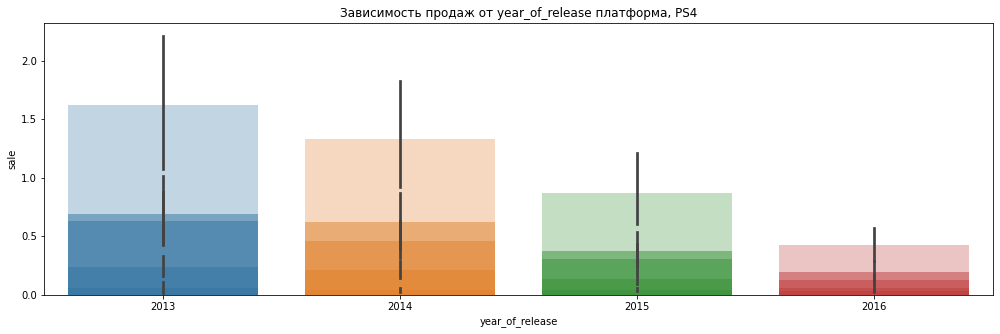

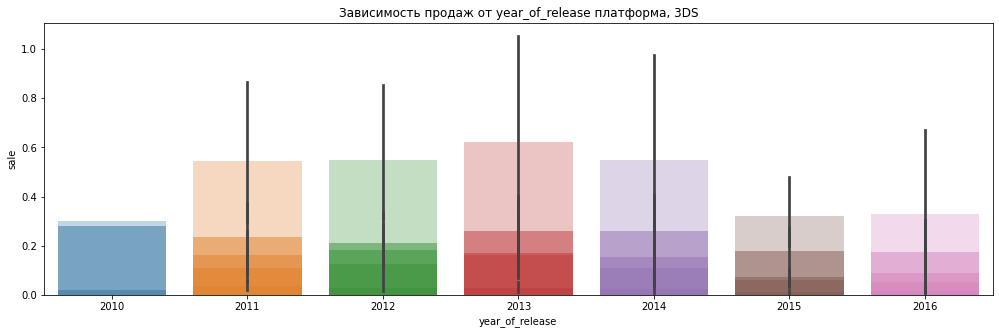

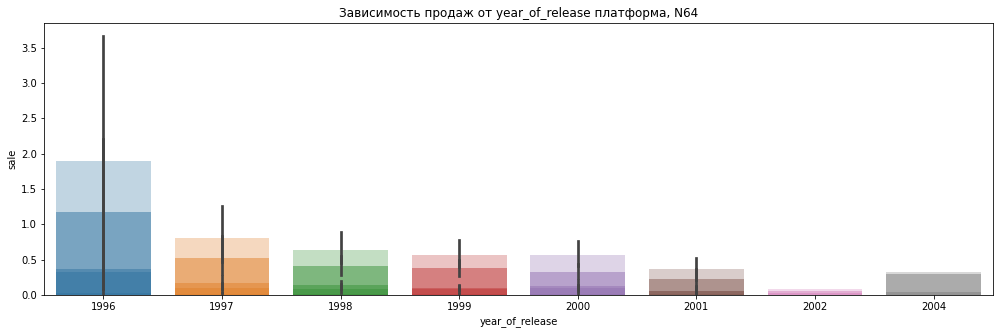

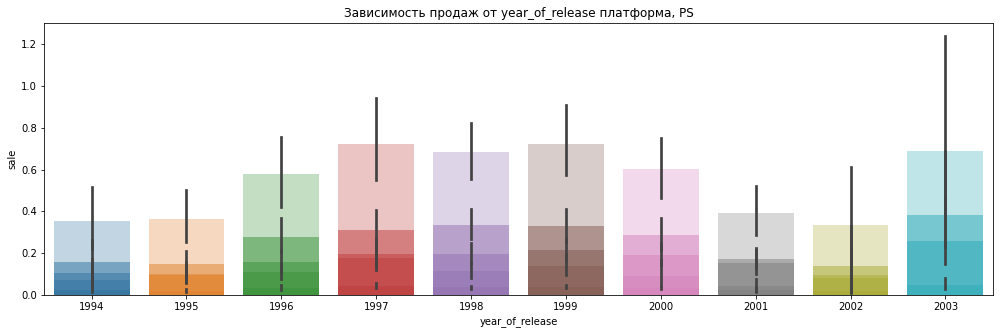

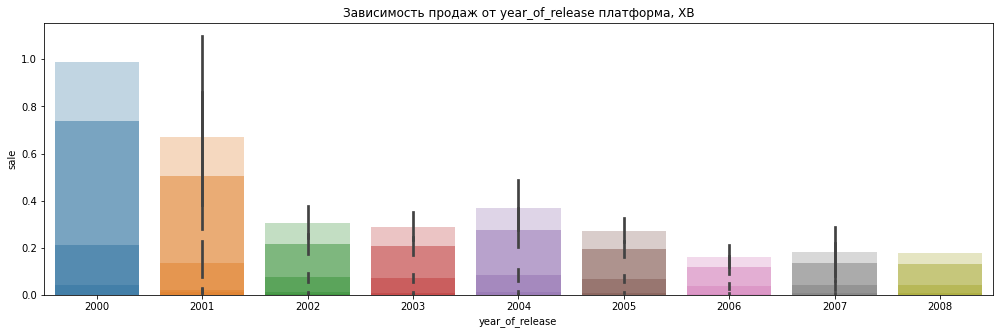

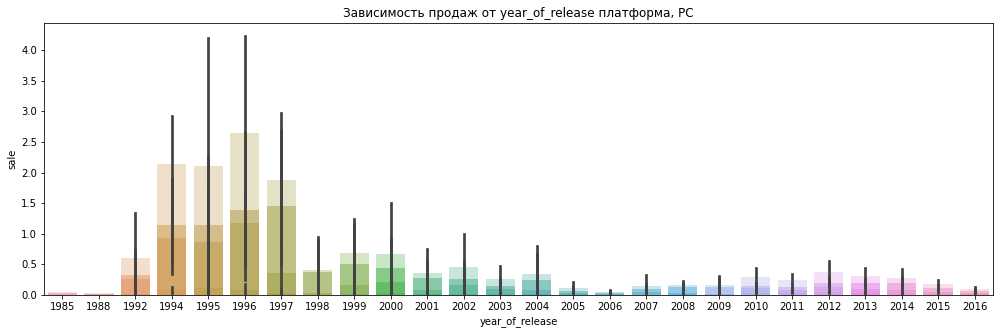

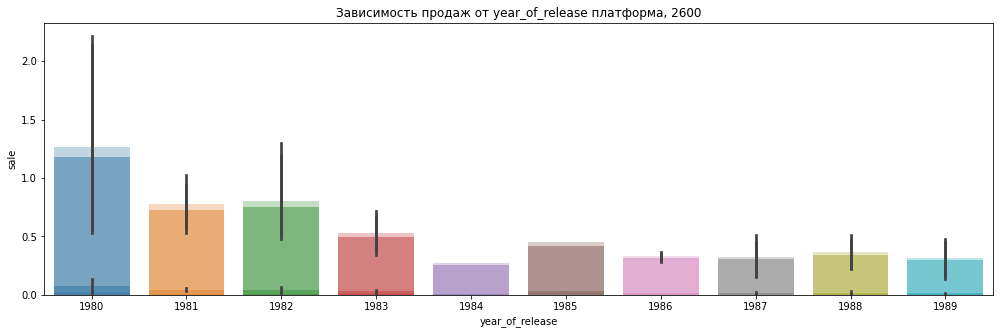

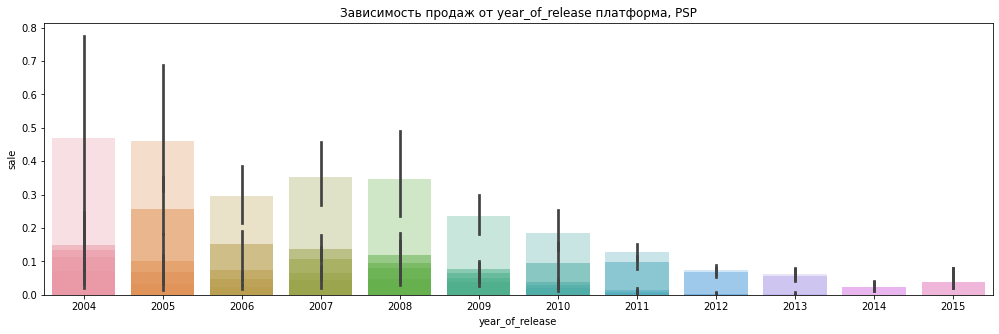

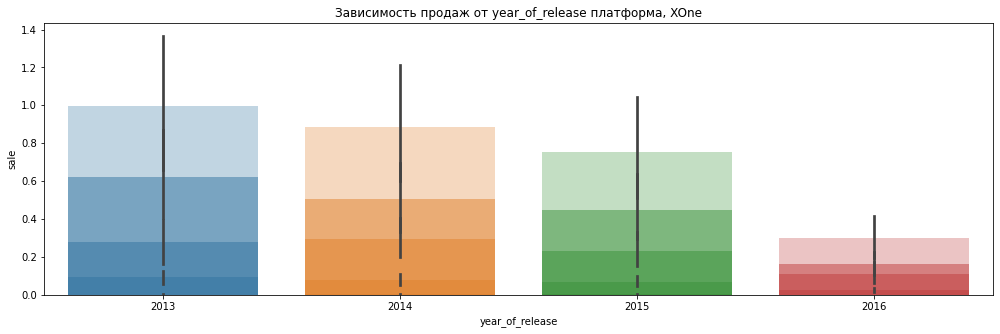

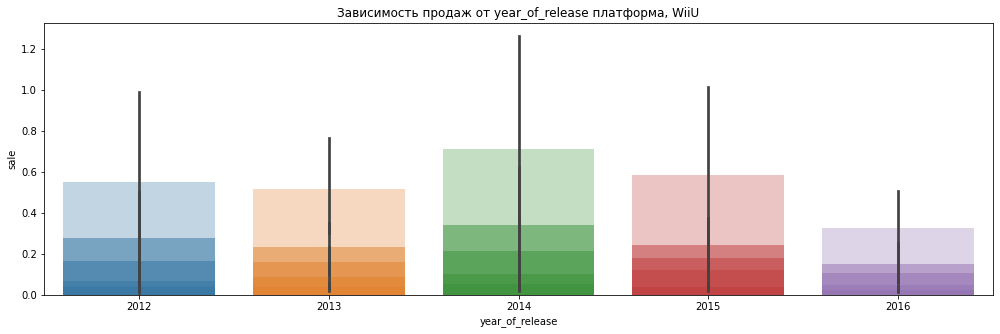

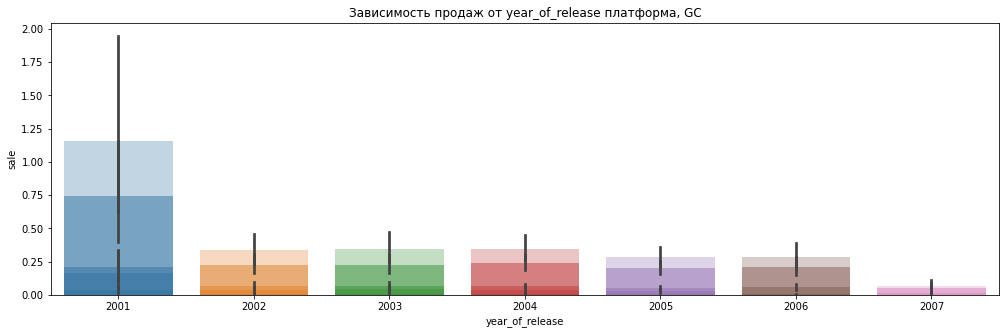

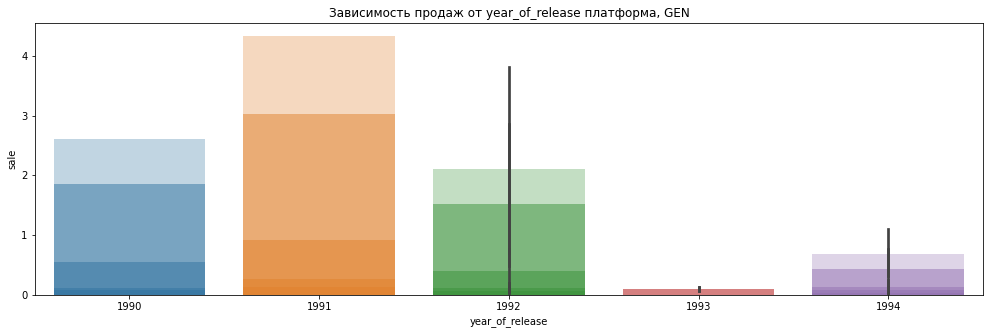

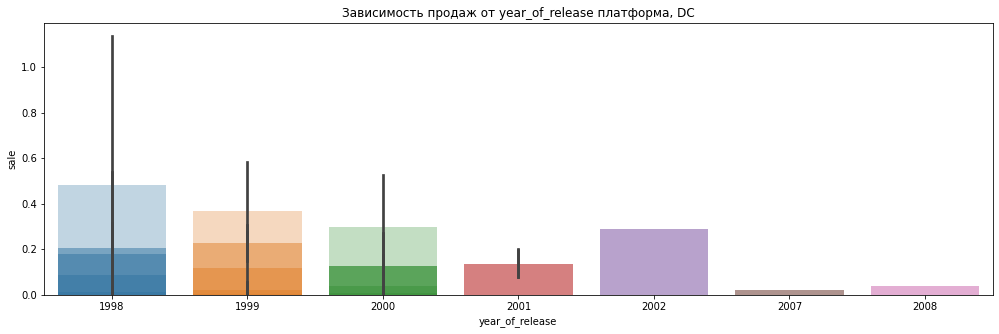

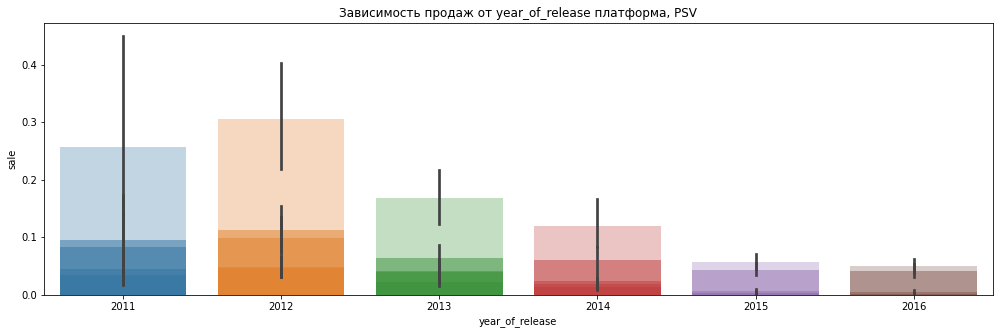

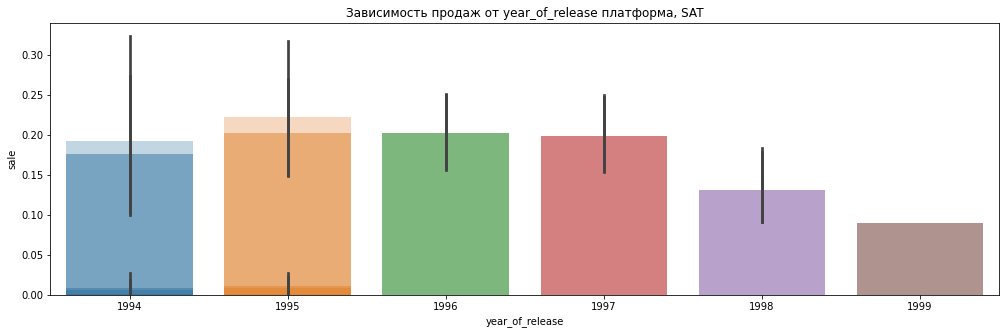

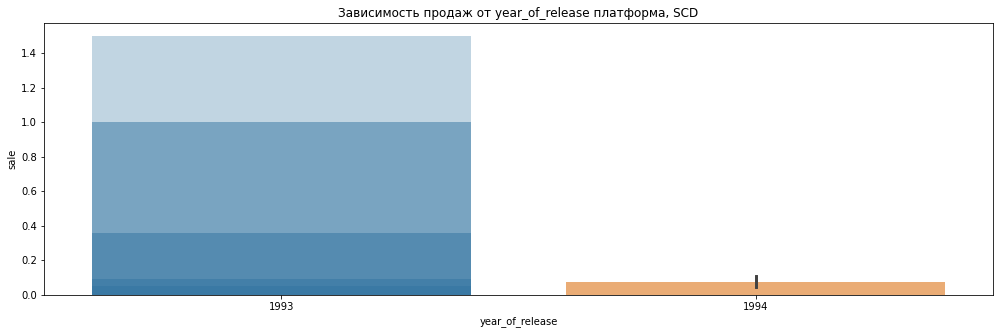

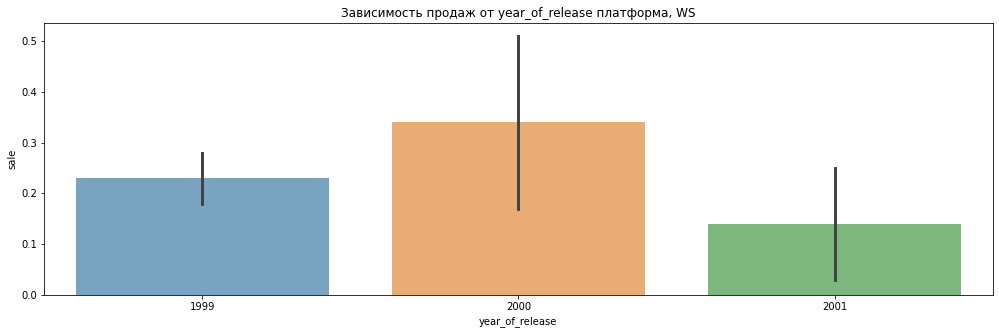

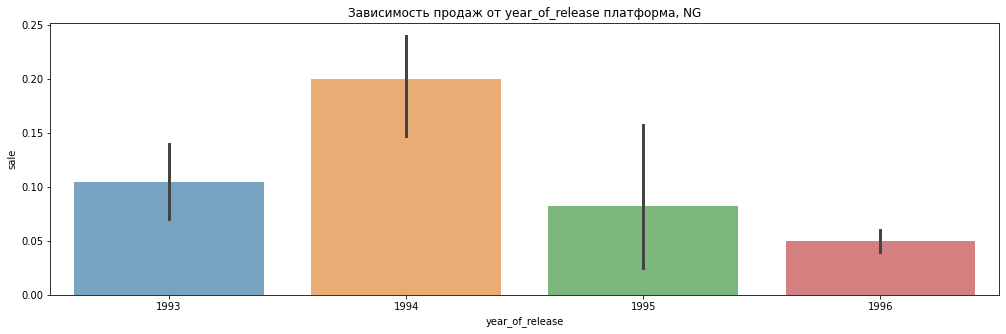

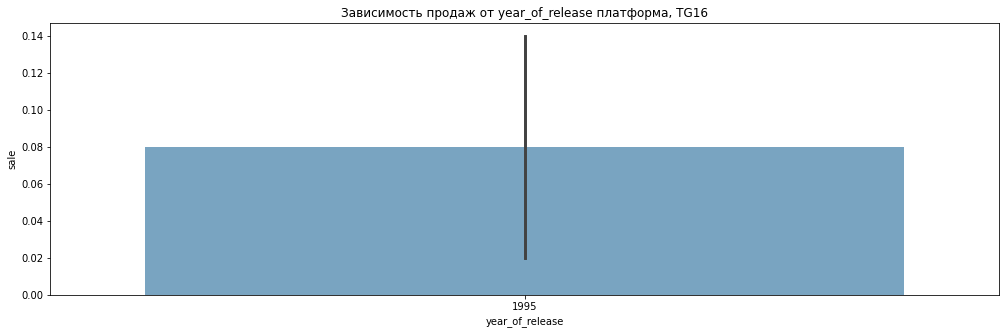

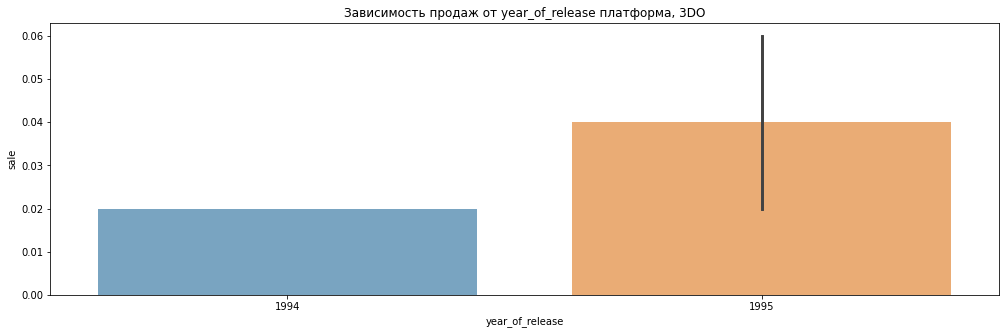

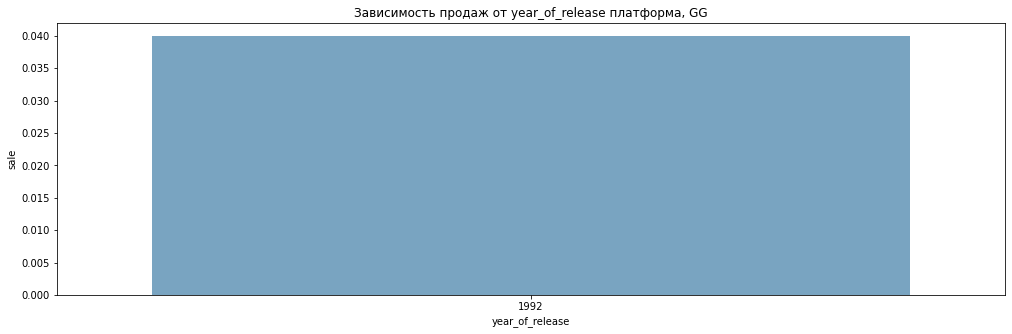

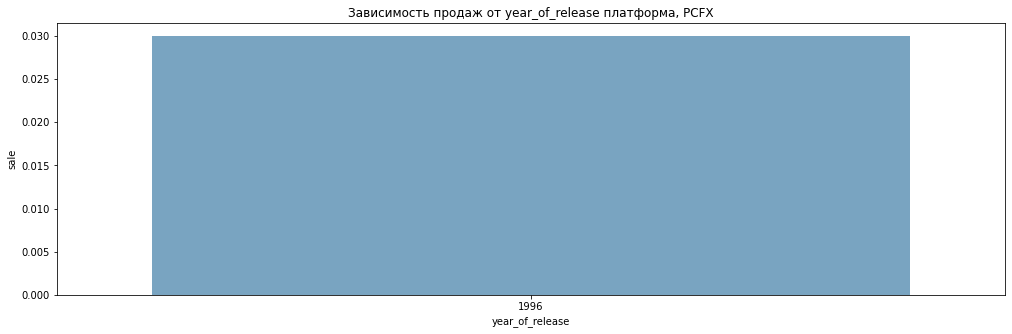

In [55]:
# Построим барплоты зависимости продаж от года выпуска по платформам
for i in df['platform'].unique():
    plt.figure(figsize=(17,5))
    sns.barplot(df.query('platform==@i')['year_of_release'],df.query('platform==@i')['sale'],alpha=0.3)
    sns.barplot(df.query('platform==@i')['year_of_release'],df.query('platform==@i')['na_sales'],alpha=0.5)
    sns.barplot(df.query('platform==@i')['year_of_release'],df.query('platform==@i')['eu_sales'],alpha=0.5)
    sns.barplot(df.query('platform==@i')['year_of_release'],df.query('platform==@i')['jp_sales'],alpha=0.5)
    sns.barplot(df.query('platform==@i')['year_of_release'],df.query('platform==@i')['other_sales'],alpha=0.5)
    plt.ylabel('sale')
    plt.title(f'Зависимость продаж от year_of_release платформа, {i}')
    plt.show()

In [56]:
# Выберем 5 платформ с наибольшими суммарными продажами 
df_platform_top_5 = pd.DataFrame(df_.groupby('platform')['sale']
                                 .sum()
                                 .sort_values(ascending=False)
                                 .head(5)
                                ).reset_index()
df_platform_top_5

,platform,sale
0,PS2,"1,245.96"
1,X360,966.61
2,PS3,934.71
3,Wii,903.31
4,DS,804.26


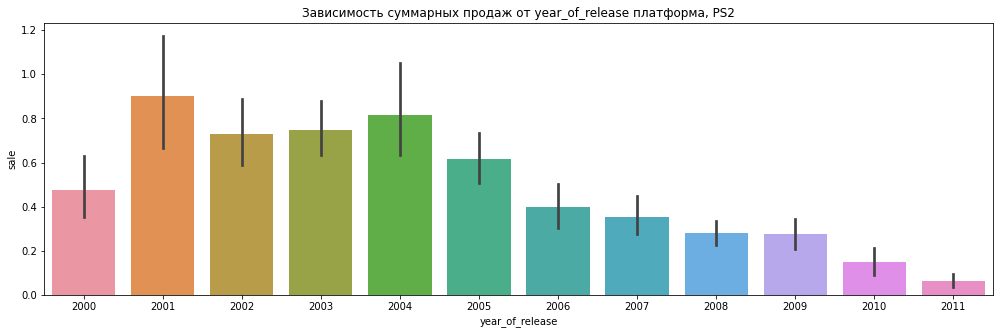

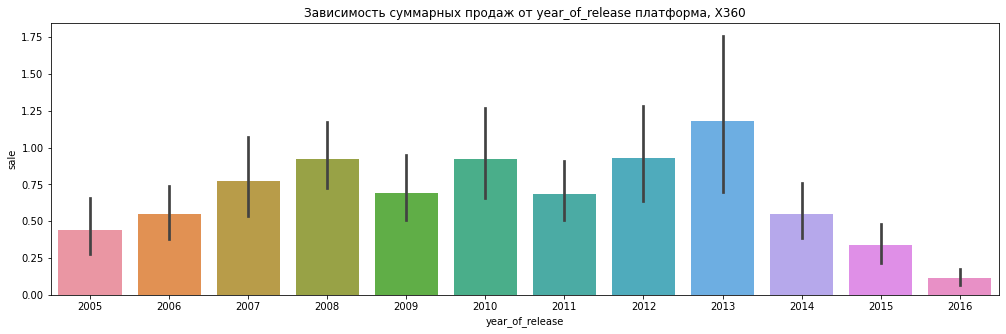

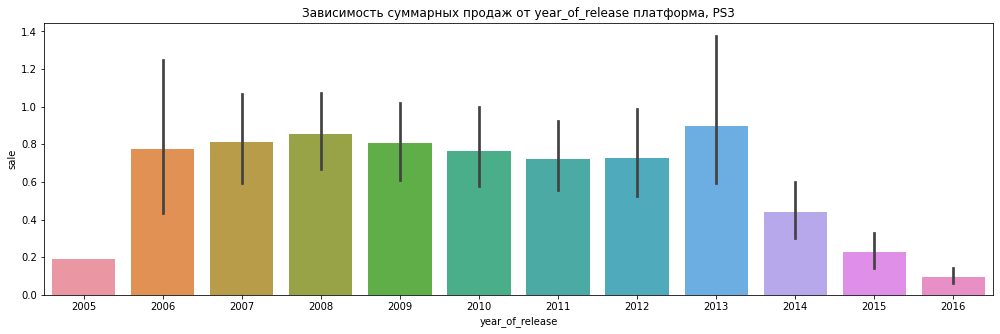

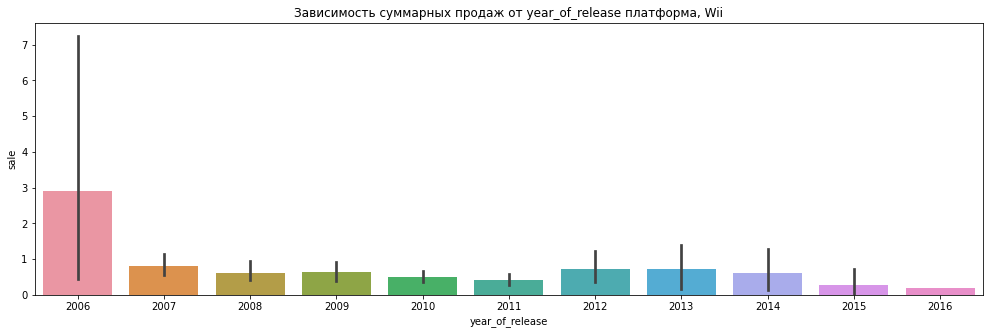

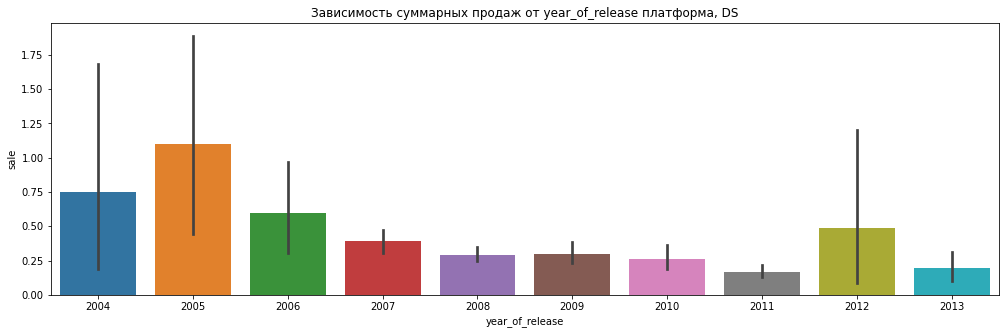

In [57]:
# Построим распределение по топ 5 платформам по годам
for i in df_platform_top_5['platform']:
    plt.figure(figsize=(17,5))
    sns.barplot(df_.query('platform==@i')['year_of_release'],df_.query('platform==@i')['sale'])
    plt.title(f'Зависимость суммарных продаж от year_of_release платформа, {i}')
    plt.show()

In [58]:
df_platform_top_5
for i in df_platform_top_5.platform:
    print('Средняя продолжителньость жизни платформы',i,'составляет',df_[df['platform']==i]['year_of_release'].max() - \
                                                                     df_[df['platform']==i]['year_of_release'].min(),'лет')

Средняя продолжителньость жизни платформы PS2 составляет 11 лет
Средняя продолжителньость жизни платформы X360 составляет 11 лет
Средняя продолжителньость жизни платформы PS3 составляет 11 лет
Средняя продолжителньость жизни платформы Wii составляет 10 лет
Средняя продолжителньость жизни платформы DS составляет 9 лет


В среднем срок продаж по платформе 9-11 лет. По играм, выпущенным в первые 1-2 года наблюдаются максимальные продажи, далее размер продаж по играм ,выпущеным в последующие года на одном уровне несколько лет, по играм, которые выпускаются в последние года платформы спад объема продаж. Но есть платформы, по которым в последний год поддержки наоборот наблюдаются большие продажи.

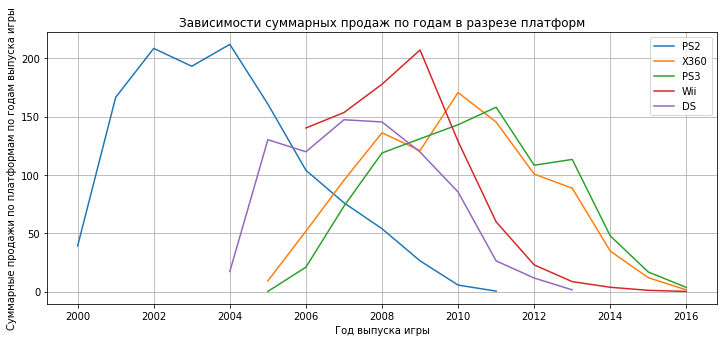

In [59]:
fig, ax = plt.subplots()
ax = (df_.query('platform == "PS2"')
      .pivot_table(index='year_of_release', values='sale',aggfunc=sum)
      .plot(grid=True, figsize=(12, 5),ax=ax,label='PS2')     
    )
plt.title('Зависимости суммарных продаж по годам в разрезе платформ')
for i in list(df_platform_top_5['platform'])[1:]: 
    ax1 = (df_.query('platform == @i')
      .pivot_table(index='year_of_release', values='sale',aggfunc=sum)
      .plot(grid=True, figsize=(12, 5),ax=ax,label=i)    
    )
plt.ylabel('Суммарные продажи по платформам по годам выпуска игры')
plt.xlabel('Год выпуска игры')
plt.legend(labels=list(df_platform_top_5['platform']))    
plt.show()

Компьютерные игры - это очень инновационная отрасль, где каждый год случается революция. Поэтому за актуальный период следует брать короткий период - 2-3 года. Более старые данные для нас неактуальны также в связи с изменением экономической ситуации. Для прогноза на 2017 год по продажам, возьмём данные за 2014,2015 и 2016 года 

In [60]:
df_relevant = df_.query('year_of_release >= 2014')

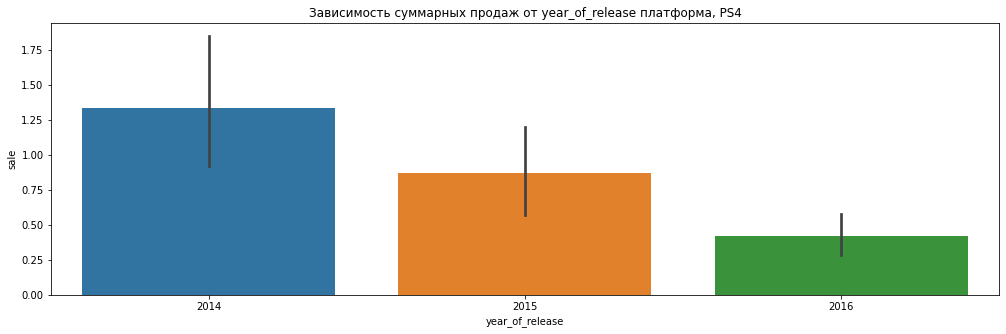

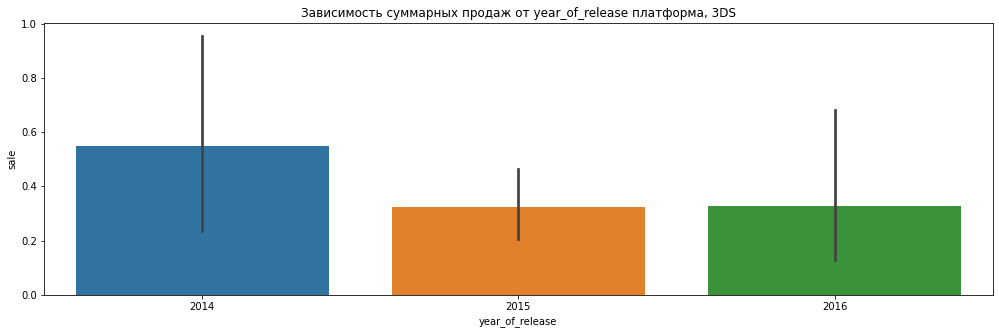

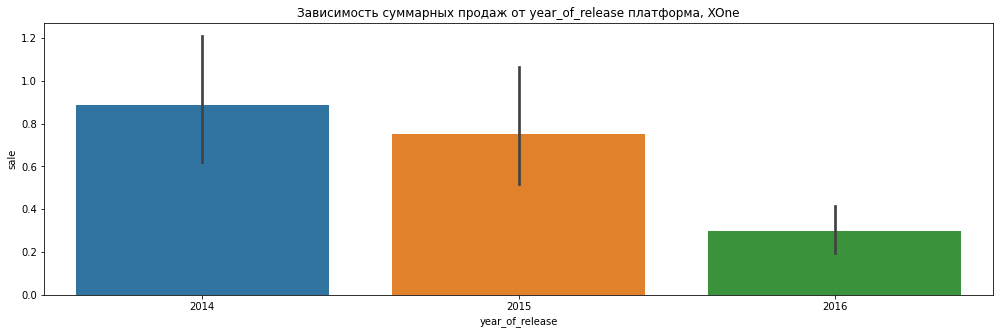

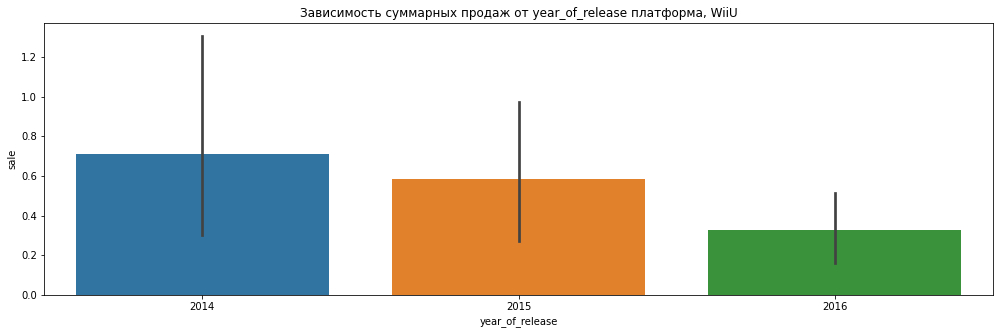

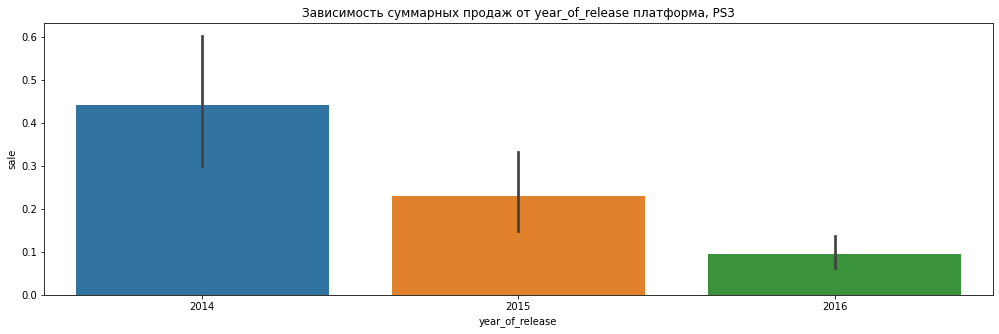

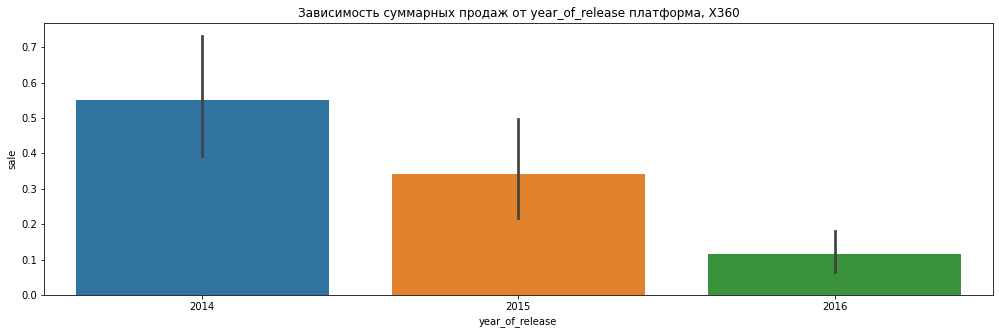

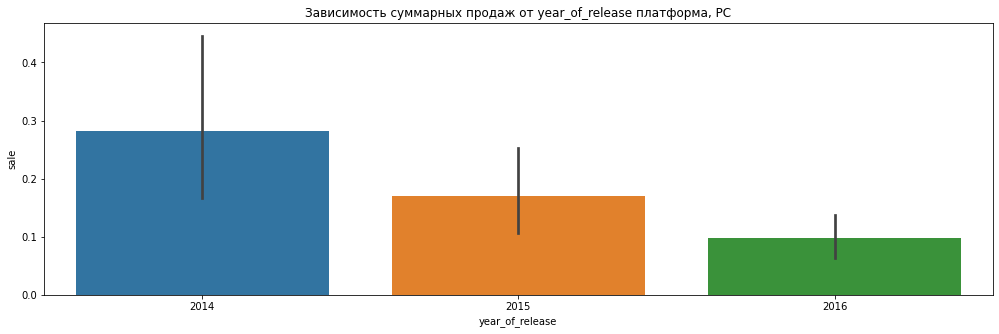

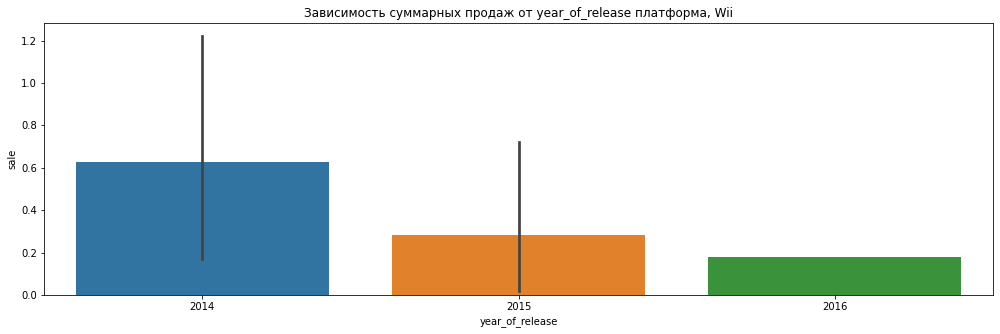

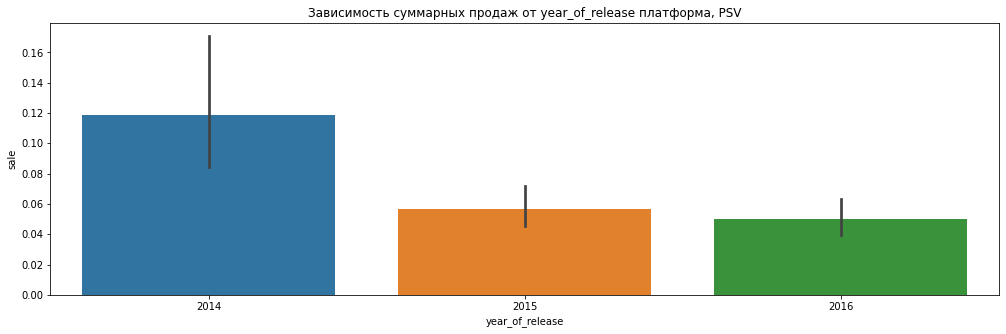

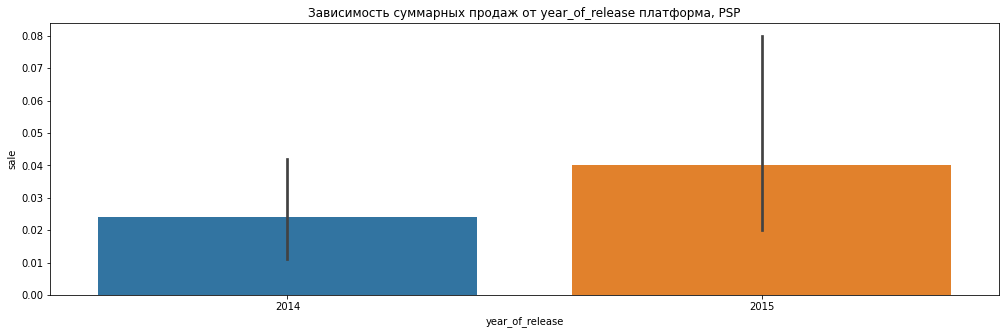

In [61]:
platform_relevant = df_relevant['platform'].unique()
for i in platform_relevant:
    plt.figure(figsize=(17,5))
    sns.barplot(df_relevant.query('platform==@i')['year_of_release'],df_relevant.query('platform==@i')['sale'])
    plt.title(f'Зависимость суммарных продаж от year_of_release платформа, {i}')
    plt.show()

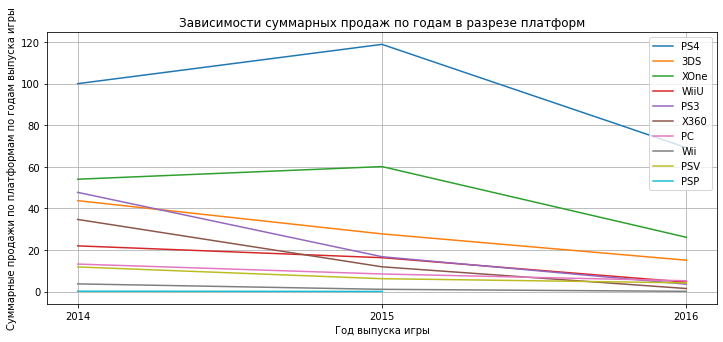

In [62]:
fig, ax = plt.subplots()
ax = (df_relevant.query('platform == "PS4"')
      .pivot_table(index='year_of_release', values='sale',aggfunc=sum)
      .plot(grid=True, figsize=(12, 5),ax=ax,label='PS4')     
    )
plt.title('Зависимости суммарных продаж по годам в разрезе платформ')
for i in platform_relevant[1:]: 
    ax1 = (df_relevant.query('platform == @i')
      .pivot_table(index='year_of_release', values='sale',aggfunc=sum)
      .plot(grid=True, figsize=(12, 5),ax=ax,label=i)    
    )
    
plt.ylabel('Суммарные продажи по платформам по годам выпуска игры')
plt.xlabel('Год выпуска игры')
plt.legend(labels=platform_relevant)
plt.xticks([2014, 2015, 2016])
plt.show()

Согласна исходной информации данные за 2016 год могут быть не полные.
Потенциально прибыльные платформы PS4,XOne.

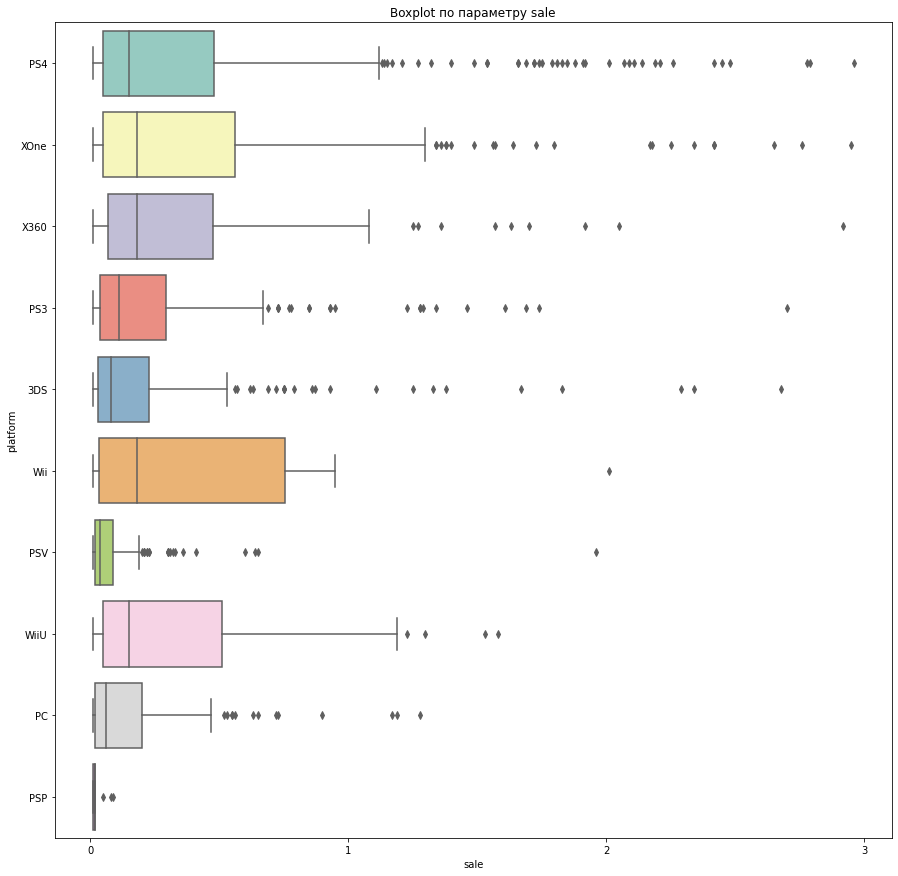

In [63]:
# Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(15,15))
sns.boxplot(x = 'sale', y = 'platform', data = df_relevant.query('sale < 3'), orient="h", palette="Set3")
plt.title(f'Boxplot по параметру sale')
plt.xticks([0,1,2,3])
plt.show()
print()

**Вывод:**  
В среднем срок продаж по платформе 9-11 лет.  
Потенциально прибыльные платформы PS4,XOne.  


### Влияние отзывов на продажи.

In [64]:
# Посмотрим влияние отзывов на продажу по платформе X360
# (2я платформа по полурности, по PS2 (лидер) нет данных за актуальный период)
df_X360 = df_relevant.query('platform == "X360"')

In [65]:
df_X360.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 263 to 16491
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             111 non-null    object 
 1   platform         111 non-null    object 
 2   year_of_release  111 non-null    int64  
 3   genre            111 non-null    object 
 4   na_sales         111 non-null    float64
 5   eu_sales         111 non-null    float64
 6   jp_sales         111 non-null    float64
 7   other_sales      111 non-null    float64
 8   critic_score     26 non-null     float64
 9   user_score       83 non-null     float64
 10  rating           111 non-null    object 
 11  sale             111 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 11.3+ KB


In [66]:
df_X360.critic_score.describe()

count   26.00
mean    63.73
std     15.06
min     32.00
25%     51.50
50%     67.00
75%     73.50
max     91.00
Name: critic_score, dtype: float64

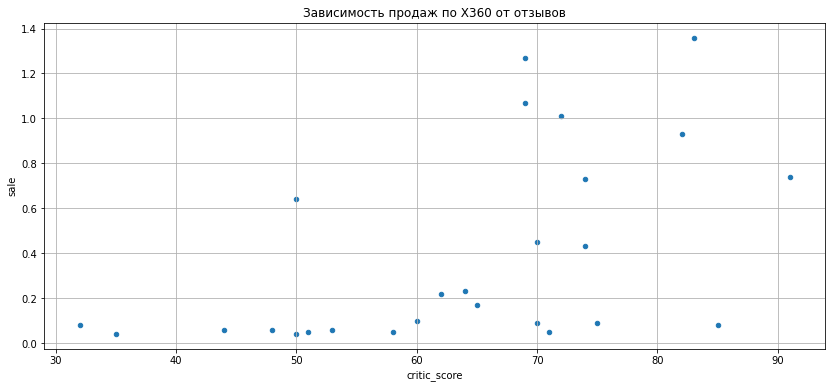

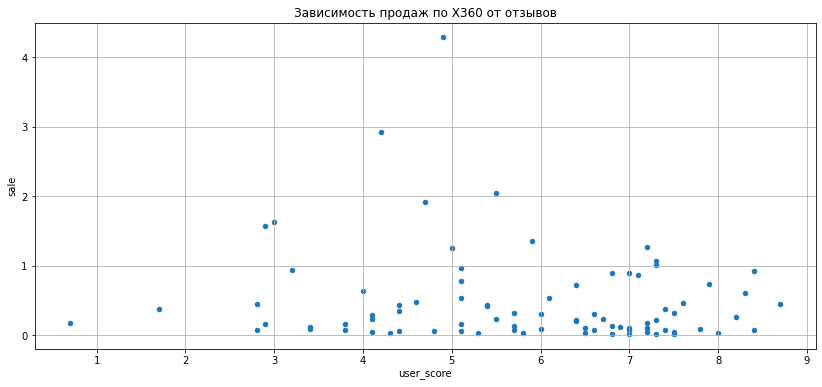

In [67]:
for i in ['critic_score','user_score']:
    (df_X360.plot(x=i,
             y='sale',
             kind='scatter',
             grid='True',
             figsize=(14,6),
             title='Зависимость продаж по X360 от отзывов')
    )
    plt.show()

Согласно графикам нет прямой зависимости объема продаж от отзывов пользователей или критиков.

In [68]:
# посмотрим корреляцию 
df_X360[['critic_score', 'user_score', 'sale']].corr().style.applymap(lambda x: f"color: {'red' if (abs(x) > 0.5  and x !=1) else 'black'}")

,critic_score,user_score,sale
critic_score,1.000000,0.625309,0.525723
user_score,0.625309,1.000000,-0.138445
sale,0.525723,-0.138445,1.000000


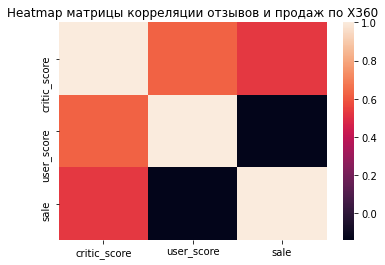

In [69]:
# для наглядности построим heatmap матрицы корреляции
sns.heatmap(df_X360[['critic_score', 'user_score', 'sale']].corr(), xticklabels=df_X360[['critic_score', 'user_score', 'sale']].corr().columns, yticklabels=df_X360[['critic_score', 'user_score', 'sale']].corr().columns)
plt.title('Heatmap матрицы корреляции отзывов и продаж по X360')
plt.show()

По платформе Х360 наблюдается средняя корреляция между оценками пользователей и критиков, и средняя корреляция между продажами и оценкой критиков.

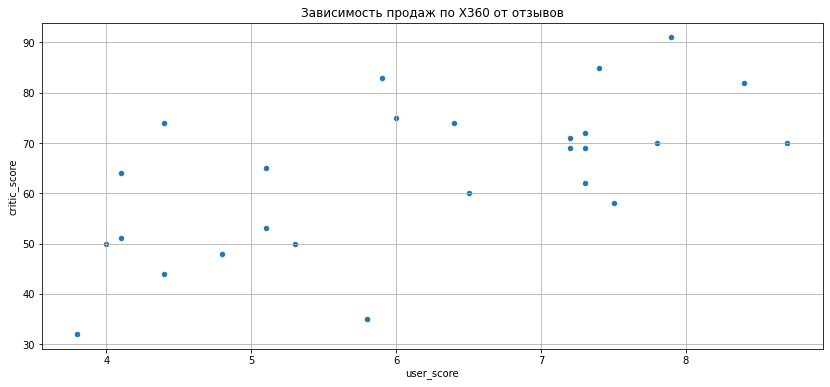

In [70]:
# Построим график зависимости между оценками пользователей и критиков
df_X360.plot(x='user_score',
             y='critic_score',
             kind='scatter',
             grid='True',
             figsize=(14,6),
             title='Зависимость продаж по X360 от отзывов')
plt.show()

In [71]:
# посмотрим корреляцию отзывов и продаж в целом по всем платформам
df_relevant[['critic_score', 'user_score', 'sale']].corr().style.applymap(lambda x: f"color: {'red' if (abs(x) > 0.5  and x !=1) else 'black'}")

,critic_score,user_score,sale
critic_score,1.000000,0.504460,0.328105
user_score,0.504460,1.000000,-0.013070
sale,0.328105,-0.013070,1.000000


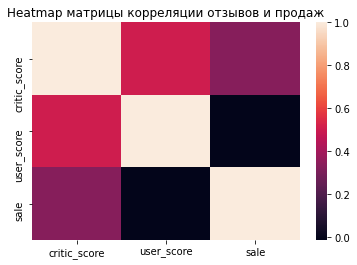

In [72]:
# для наглядности построим heatmap матрицы корреляции
sns.heatmap(df_relevant[['critic_score', 'user_score', 'sale']].corr(), xticklabels=df_relevant[['critic_score', 'user_score', 'sale']].corr().columns, yticklabels=df_relevant[['critic_score', 'user_score', 'sale']].corr().columns)
plt.title('Heatmap матрицы корреляции отзывов и продаж')
plt.show() 

В целом по всем платформам наблюдается средняя корреляция между оценками пользователей и критиков, и слабая корреляция между продажами и оценкой критиков.

**Вывод:**  
По платформе Х360 и в целом по всем платформам наблюдается средняя корреляция между оценками пользователей и критиков.   
По платформе Х360 средняя корреляция между продажами и оценкой критиков, а в целом по всем платформам слаба корреляция между данными показателями.

### Влияние жанра на продажи.

In [73]:
# Посмотрите на общее распределение игр по жанрам. 
df_relevant.groupby('genre')['genre'].count().sort_values(ascending = False)

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

In [74]:
# Посмотрите на продажи по жанрам. 
df_relevant.pivot_table(index='genre',values='sale',aggfunc=sum).sort_values(by='sale',ascending = False)

,sale
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


In [75]:
# Посмотрите на продажи по жанрам в разрезе платформ.
for i in df_relevant['platform'].unique():
    print(f'Платформа {i}')
    display(df_relevant.query('platform == @i').pivot_table(index='genre',values='sale',aggfunc=sum).sort_values(by='sale',ascending = False).head())
    print()

Платформа PS4


,sale
genre,
Action,91.62
Shooter,78.46
Sports,50.01
Role-Playing,28.99
Racing,10.16



Платформа 3DS


,sale
genre,
Role-Playing,40.02
Action,22.06
Fighting,8.10
Simulation,4.13
Platform,3.98



Платформа XOne


,sale
genre,
Shooter,55.39
Action,31.06
Sports,23.68
Role-Playing,10.55
Racing,6.89



Платформа WiiU


,sale
genre,
Action,9.99
Racing,7.09
Platform,6.87
Fighting,5.88
Shooter,4.83



Платформа PS3


,sale
genre,
Action,18.10
Sports,17.47
Shooter,12.17
Misc,6.69
Role-Playing,6.63



Платформа X360


,sale
genre,
Shooter,13.66
Sports,13.40
Action,12.33
Role-Playing,2.76
Adventure,1.90



Платформа PC


,sale
genre,
Simulation,6.59
Shooter,5.79
Action,5.34
Role-Playing,4.87
Strategy,2.29



Платформа Wii


,sale
genre,
Misc,3.14
Action,1.19
Sports,0.56
Adventure,0.18



Платформа PSV


,sale
genre,
Action,7.47
Role-Playing,6.10
Misc,3.43
Adventure,2.29
Sports,1.20



Платформа PSP


,sale
genre,
Action,0.20
Sports,0.09
Adventure,0.05
Misc,0.02


**Вывод**  
Если оценивать в целом Датафрейм , то топ 5 самых продаваемых жанра это Action,Shooter,Sports,Role-Playing,Misc. При анализе данных в разрезе платформ(за актуальный период) так же в топ 5 самых продаваемых жанра входят Platform(3DS), Fighting(3DS), Simulation(3DS), Racing(PS4,XOne), Strategy(PS),Adventure(X360,Wii,PSV,PSP). 

## Портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):  
- Самые популярные платформы (топ-5).  
- Самые популярные жанры (топ-5).  
- Влияние рейтинга ESRB на продажи в отдельном регионе. 

### Топ 5 платформ по регионам.

In [76]:
# Функция , получает датафрейм, название колонки( строковое значение),и два списка, 
# по первому формируется полный датафрейм, по второму списку  формируем данные для вывода на экран.
def top_sale(df,col,arr1=['na_sales','eu_sales','jp_sales','other_sales','sale'],arr2=['na_sales','eu_sales','jp_sales']):
    top_sale = df.pivot_table(index=col,values=arr1,aggfunc=sum)

    for i in arr2:        
        top_sale[f'{i}_ratio_sale'] = top_sale[i] / top_sale['sale'] * 100
        
    for i in arr2:
        print(f'Самые популярные {col} (топ-5) по региону {i[:2].upper()}')
        top_sale_ = top_sale.sort_values(by=i,ascending=False).head(5)
        top_sale_[f'{i}_ratio'] = top_sale_[i] / top_sale_[i].sum() * 100
        display(top_sale_[[i,f'{i}_ratio',f'{i}_ratio_sale']])
        print()
        print()    

In [77]:
# Посмотрим самые популярные платформы по продажам по регионам
top_sale(df_relevant,'platform')

Самые популярные platform (топ-5) по региону NA


,na_sales,na_sales_ratio,na_sales_ratio_sale
platform,,,
PS4,98.61,39.00,34.22
XOne,81.27,32.14,57.90
X360,28.30,11.19,58.69
3DS,22.64,8.95,26.12
PS3,22.05,8.72,32.34




Самые популярные platform (топ-5) по региону EU


,eu_sales,eu_sales_ratio,eu_sales_ratio_sale
platform,,,
PS4,130.04,55.12,45.13
XOne,46.25,19.60,32.95
PS3,25.54,10.83,37.46
PC,17.97,7.62,66.43
3DS,16.12,6.83,18.60




Самые популярные platform (топ-5) по региону JP


,jp_sales,jp_sales_ratio,jp_sales_ratio_sale
platform,,,
3DS,44.24,47.92,51.04
PS4,15.02,16.27,5.21
PSV,14.54,15.75,64.91
PS3,11.22,12.15,16.46
WiiU,7.31,7.92,17.01


Платформы `PS3`,`PS4`,`3DS` входят в топ 5 популярных платформ по всем регионам. По Японии в топ 5 платформ еще входят `PSV`,`WiiU`. А по Европе и Северной Америке `XOne`. По Европе `PC`,по Северной Америке `X360`.  
По `3DS` более 51%, по `PSV` более 64%  продаж в общем объеме продаж приходятся на Японию.  
По платформе `PS3` и `PS4` 32.34%  и 34.22% от общих продаж у Северной Америки, 37.46% и 45.13 Европа и 16.46% и 5.21% Япония. 
По платформе `XOne` 57.90% продаж у Северной Америки( доля продаж в Северной Америке в Топ5 у данной платформы 32.14%) и 32.95% у Европы в общих продажах по регионам(19.60% доля в продажах по Европе из Топ5).  
По платформе `X360` 58.69% продаж у Северной Америки, что составляет 11.19% продаж в Северной Америке(топ5).

### Топ 5 жанров по регионам.

In [78]:
# Посмотрим самые популярные жанры по продажам по регионам
top_sale(df_relevant,'genre')

Самые популярные genre (топ-5) по региону NA


,na_sales,na_sales_ratio,na_sales_ratio_sale
genre,,,
Shooter,79.02,32.10,46.23
Action,72.53,29.46,36.38
Sports,46.13,18.74,42.14
Role-Playing,33.47,13.59,32.99
Misc,15.05,6.11,40.08




Самые популярные genre (топ-5) по региону EU


,eu_sales,eu_sales_ratio,eu_sales_ratio_sale
genre,,,
Action,74.68,32.72,37.46
Shooter,65.52,28.71,38.33
Sports,45.73,20.04,41.77
Role-Playing,28.17,12.34,27.77
Racing,14.13,6.19,51.34




Самые популярные genre (топ-5) по региону JP


,jp_sales,jp_sales_ratio,jp_sales_ratio_sale
genre,,,
Role-Playing,31.16,40.16,30.72
Action,29.58,38.12,14.84
Fighting,6.37,8.21,22.57
Misc,5.61,7.23,14.94
Shooter,4.87,6.28,2.85


**Вывод:**  
`Action`, `Shooter`, `Role-Playing` три жанра , которые входят в топ 5 по всем регионам.  
`Shooter` на втором месте по популярности в Европе и на первом Северной Америке (38,33% и 46,23%  в общих продажах соответственно). Это составляет 28,71 продаж от продаж по Европе и 32,10% продаж по Северной Америке. Но данный жанр на 5 месте по популярности в Японии и составляет всего 6.28% продаж внутри Японии.  
`Role-Playing` на первом месте по полуярности в Японии (30,72% от общих продаж и 40,16% от суммы продаж в Японии).  
В Европе также популярен жанр `Racing`(6,19% от продаж Европы и 51,34% от общих продаж по всем регионам )    
В Японии в топ 5 попал жанр `Fighting`(8,21% от продаж в Японии и 22,57% от продаж по всем регионам).  
Доля жанра Misc в Японии составляет 7.23% продаж внутри Японии и 6.11% продаж в Северной Америке.


### Влияние рейтинга ESRB на продажи в отдельном регионе. 

In [79]:
# Построим сводную таблицу по рейтингу ESRB в разрезе регионов по суммарным продажам
df_rating = df_relevant.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales','sale'],aggfunc=sum).sort_values(by='na_sales',ascending=False)

In [80]:
df_rating['eu_sales_rating'] = df_rating['eu_sales']/df_rating['sale']*100
df_rating['jp_sales_rating'] = df_rating['jp_sales']/df_rating['sale']*100
df_rating['na_sales_rating'] = df_rating['na_sales']/df_rating['sale']*100
df_rating

,eu_sales,jp_sales,na_sales,sale,eu_sales_rating,jp_sales_rating,na_sales_rating
rating,,,,,,,
M,93.44,8.01,96.42,226.54,41.25,3.54,42.56
Unknown,58.95,56.90,64.72,198.97,29.63,28.60,32.53
E,58.06,8.94,50.74,133.13,43.61,6.72,38.11
T,34.07,14.78,38.95,99.13,34.37,14.91,39.29
E10+,26.16,4.46,33.23,71.68,36.50,6.22,46.36


«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет
«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
«T» («Teen») — «Подросткам» Игра подходит для лиц от 13 лет.
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет
«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
«RP» («Rating Pending») — «Рейтинг ожидается»:
K-A for Kids to Adults: Games that contain content that is suitable for a general audience. This rating was used until the year 1998 when it renamed to E

**Вывод:**  
Самые популярные игры это игры с рейтингом «Для взрослых» (Материалы игры не подходят для подростков младше 17 лет) в Европе и Северной Америке.
Далее по убыванию популярности в Северной Америке и Японии рейтинги: «Для всех»,«Подросткам»,«Для всех от 10 лет и старше».
В Японии самые популярные игры с рейтингом «Подросткам» (Игра подходит для лиц от 13 лет.)
Далее по убыванию популярности в Японии «Для всех»,«Для взрослых»,«Для всех от 10 лет и старше».
Tенденции по продажам в зависимости от рейтинга совпадают по Северной Америке и Европе,но отличается от Японии. Так же в Японии 28,6 от общих продаж по всем регионам незаполненных рейтингов, но доля Японии в общих продажах по заполненным рейтингам варьируется от 3 до 14,91% в зависимости от рейтинга.
Северная Америка продает примерно 30-46% всех игр в разрезе каждого рейтинга, Европа плюс/минус 30-43%.

## Проверка гипотез.

Проверим гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  

Пороговое значение alpha зададим на уровне 0,05.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза** : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind ()  
**Альтернативная гипотеза**: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

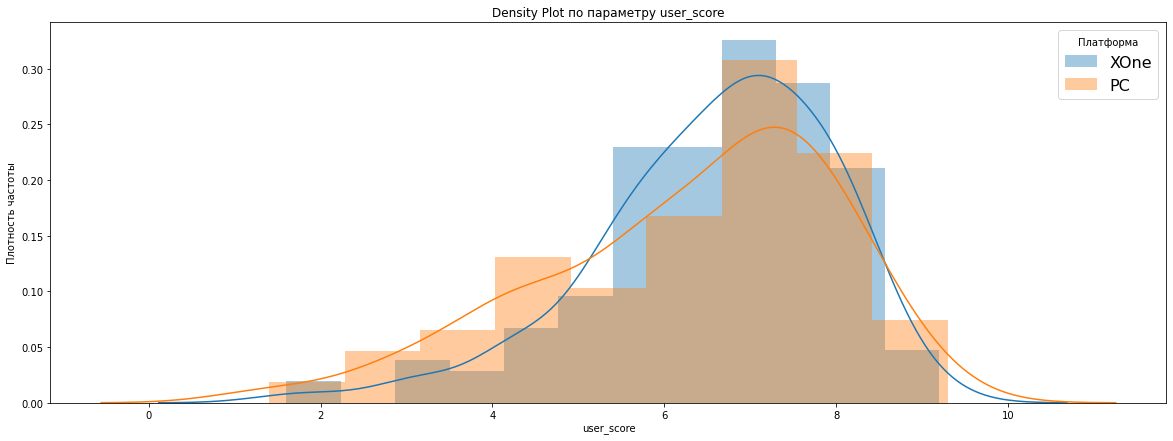

In [81]:
# построим график пользовательского рейтинга по плаиформам XOne и PC
plt.figure(figsize=(20,7))
subset = df_relevant[df_relevant['platform'] == 'XOne']
sns.distplot(subset['user_score'], 
                 hist = True, 
                 kde = True,
                 kde_kws = {'linewidth': 1.5},
                 label = 'XOne'
            )
plt.legend(prop={'size': 16}, title = 'XOne')

subset = df_relevant[df_relevant['platform'] == 'PC']  
sns.distplot(subset['user_score'], 
                 hist = True, 
                 kde = True,
                 kde_kws = {'linewidth': 1.5},
                 label = 'PC'
            )

plt.legend(prop={'size': 16}, title = 'Платформа')
plt.title(f'Density Plot по параметру user_score')
plt.xlabel('user_score')
plt.ylabel('Плотность частоты')
plt.show()

In [82]:
# Воспользуемся стат.тестом Левене, для понимания какое значение указывать по параметру equal_var для проверки гипотезы
st.levene(df_relevant[(df_relevant['platform'] == 'XOne')  & (~df_relevant['user_score'].isna())]['user_score'],
          df_relevant[(df_relevant['platform'] == 'PC') & (~df_relevant['user_score'].isna())]['user_score']
         ).pvalue

0.014868430917663678

Значение pvalue теста Левене менее 0,05 говорит о том, что данные выборки имеют разные дисперсии. Параметр equal_var необходимо указать как False.

In [83]:
# рассчитаем pvalue для понимания возможности отвергнуть нулевую гипотезу
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(df_relevant[(df_relevant['platform'] == 'XOne')  & (~df_relevant['user_score'].isna())]['user_score'],
                       df_relevant[(df_relevant['platform'] == 'PC') & (~df_relevant['user_score'].isna())]['user_score'],
                       equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Вывод:

p-значение 11,6%, мы не можем отвергнуть нулевую гипотезу. *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.*

### Средние пользовательские рейтинги жанров Action и Sports разные.

**Нулевая гипотеза** : Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind ()  
**Альтернативная гипотеза**: Средние пользовательские рейтинги жанров Action и Sports различаются.

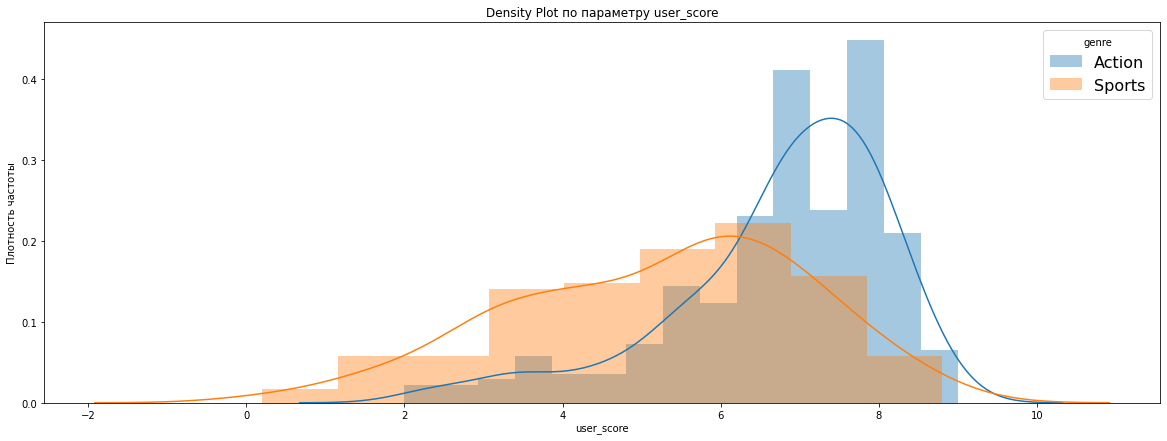

In [84]:
# построим график выручке по Москве и другим регионам
plt.figure(figsize=(20,7))
subset = df_relevant[(df_relevant['genre'] == 'Action') & (~df_relevant['user_score'].isna())]  
sns.distplot(subset['user_score'], 
                 hist = True, 
                 kde = True,
                 kde_kws = {'linewidth': 1.5},
                 label = 'Action'
            )
plt.legend(prop={'size': 16}, title = 'Action')

subset = df_relevant[(df_relevant['genre'] == 'Sports') & (~df_relevant['user_score'].isna())]   
sns.distplot(subset['user_score'], 
                 hist = True, 
                 kde = True,
                 kde_kws = {'linewidth': 1.5},
                 label = 'Sports'
            )

plt.legend(prop={'size': 16}, title = 'genre')
plt.title(f'Density Plot по параметру user_score')
plt.xlabel('user_score')
plt.ylabel('Плотность частоты')
plt.show()

In [85]:
# Воспользуемся стат.тестом Левене, для понимания какое значение указывать по параметру equal_var для проверки гипотезы
st.levene(df_relevant[(df_relevant['genre'] == 'Action') & (~df_relevant['user_score'].isna())]['user_score'],
          df_relevant[(df_relevant['genre'] == 'Sports') & (~df_relevant['user_score'].isna())]['user_score']
         ).pvalue

4.480161685830322e-06

Очень маленькое значение pvalue говорит о том, что данные выборки имеют разные дисперсии. Параметр equal_var необходимо указать как False.

In [86]:
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(df_relevant[(df_relevant['genre'] == 'Action') & (~df_relevant['user_score'].isna())]['user_score'],
                       df_relevant[(df_relevant['genre'] == 'Sports') & (~df_relevant['user_score'].isna())]['user_score'],
                       equal_var = False
                      ) 
print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод** 

p-значение менее 5%, мы можем отвергнуть нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports различаются.

## Общий вывод.

В связи с тем , что данные из открытых источников достаточно много пропущенных значений.
При предобработке :   
- удалены строки с отсутствующим названием игры(2 строки).  
- Год выпуска, пропущенный в данных, проставлялся, опираясь на название игры. Менее 1 % данных было удалено в связи с невозможностью проставить год выпуска. По году выпуска изменен тип данных на integer.  
-  Пропущенные данные по оценке пользователей и критиков не заполнялись. По оценке пользователей изменен тип данных на float. Значение tbd заменено на nan.  
- По рейтингу добавлена дополнительная категория unknown по данным, по которым отсутствует информация о рейтинге.  

- Данные до 1993 года не учитываются.  
- Актуальный период для прогнозирования продаж 2017 года составляет 3 года(2014,2015,2016)  


Существует средняя корреляция между оценкой пользователей и критиков.
В целом по всем платформам слабая корреляция, по платформе Х360 средняя корреляция между продажами и отзывами критиков.
Очень слабая корреляция между продажами и пользовательскими оценками.
Размер продаж зависит от платформы, года выпуска, жанра, рейтинга.  
Влияние жанра и года выпуска на продажи необходимо учитывать , но в разрезе конкретной платформы.  
Влияние рейтинга на продажи необходимо учитывать в разрехе региона продажи.  
В среднем срок продаж по платформе 9-11 лет.  
Первая гипотеза о том , что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые подтверждена.  
Вторая гипотеза подтверждена : Средние пользовательские рейтинги жанров Action и Sports различаются.  

Таким образом, определяющие успешность игры закономерности: это отзывы критиков, платформа, жанр, рейтинг, этап жизненного цикла платформы (По играм, выпущенным в первые 1-2 года существования платформы наблюдаются максимальные продажи, далее размер продаж по играм ,выпущеным в последующие года на одном уровне несколько лет, по играм, которые выпускаются в последние года платформы спад объема продаж. Но есть платформы, по которым в последний год поддержки наоборот наблюдаются большие продажи.). Влияние рейтинга , жанра зависит от региона продажи платформы.